# Proyek Analisis Data: E Commerce Public Dataset
- Nama: Muhammad Nafish Zaldinanda
- Email: muhammadnafishzaldinanda@gmail.com
- Id Dicoding: nafish

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren jumlah pesanan (Order Count) dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?
- Pertanyaan 2 : Dalam konteks waktu pemesanan, bagaimana perilaku sebagian besar pelanggan melakukan pemesanan dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?
- Pertanyaan 3 : Bagaimana tren penjualan produk (Quantity Sold) selama satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?
- Pertanyaan 4 : Produk apa yang paling banyak dan paling sedikit terjual dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?
- Pertanyaan 5 : Bagaimana tren penjualan dan revenue dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) berdasarkan demografi pelanggan yang kita miliki?


# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Wrangling**

## Gathering Data

### Load Tabel Orders

In [ ]:
orders_df = pd.read_csv(r'/content/drive/My Drive/dataset/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Load Tabel Order Payment

In [ ]:
order_payments_df = pd.read_csv('/content/drive/My Drive/dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Load Tabel Order Items

In [ ]:
order_items_df = pd.read_csv('/content/drive/My Drive/dataset/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### Load Tabel Products

In [ ]:
products_df = pd.read_csv('/content/drive/My Drive/dataset/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Load Tabel Product Category Name Translation English

In [ ]:
product_english = pd.read_csv('/content/drive/My Drive/dataset/E-Commerce Public Dataset/product_category_name_translation.csv')
product_english.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Load Tabel Customers

In [ ]:
customers_df = pd.read_csv('/content/drive/My Drive/dataset/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Assessing Data

### Menilai Tabel `orders_df`

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat tipe data yang tidak sesuai yaitu pada kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_carrier_date**, **order_estimated_delivery_date** seharusnya tipe datanya berupa timedata bukan object

Mengidentifikasi Missing Value Tabel `orders_df`

In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing value pada kolom **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**

Memeriksa Data Duplikasi Tabel `orders_df`

In [ ]:
print("Jumlah duplikasi Tabel Orders: ", orders_df.duplicated().sum())

Jumlah duplikasi Tabel Orders:  0


Tidak terdapat data duplikasi pada tabel orders

In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai Tabel `customers_df`

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Mengidentifikasi Missing Value Tabel `customers_df`

In [ ]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak terdapat missing value pada tabel customers

Memeriksa Data Duplikasi Tabel `customers_df`

In [ ]:
print("Jumlah duplikasi Tabel Customers: ", customers_df.duplicated().sum())

Jumlah duplikasi Tabel Customers:  0


Tidak terdapat data duplikasi pada tabel customers

In [ ]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Menilai Tabel `order_payments_df`

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Mengidentifikasi Missing Value Tabel `order_payments_df`

In [ ]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak terdapat missing value pada tabel order payment

Memeriksa Data Duplikasi Tabel `order_payments_df`

In [ ]:
print("Jumlah duplikasi Tabel Order Payment: ", order_payments_df.duplicated().sum())

Jumlah duplikasi Tabel Order Payment:  0


Tidak terdapat data duplikasi pada tabel order payment

In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai Tabel `order_items_df`

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat tipe data yang tidak sesuai yaitu pada kolom **shipping_limit_date**, seharusnya berupa tipe data timedata bukan object

Mengidentifikasi Missing Value Tabel `order_items_df`

In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak terdapat missing value pada tabel order items

Memeriksa Data Duplikasi Tabel `order_items_df`

In [ ]:
print("Jumlah duplikasi Tabel Order Items: ", order_items_df.duplicated().sum())

Jumlah duplikasi Tabel Order Items:  0


Tidak terdapat data duplikasi pada tabel order payment

In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai Tabel `products_df`

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Mengidentifikasi Missing Value Tabel `products_df`

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing value pada semua kolom selain pada kolom product_id pada tabel product

Memeriksa Data Duplikasi Tabel `products_df`

In [ ]:
print("Jumlah duplikasi Tabel Products: ", products_df.duplicated().sum())

Jumlah duplikasi Tabel Products:  0


Tidak terdapat data duplikasi pada tabel products

In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai Tabel `product_english`

In [ ]:
product_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Terdapat 71 kategori produk

Mengidentifikasi Missing Value Tabel `product_english`

In [ ]:
product_english.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Memeriksa Data Duplikasi Tabel `product_english`

In [ ]:
print("Jumlah duplikasi Tabel Products: ", product_english.duplicated().sum())

Jumlah duplikasi Tabel Products:  0


In [ ]:
product_english.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Cleaning Data

### Membersihkan Tabel `orders_df`

#### Menghapus Missing Values

In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat missing values pada kolom **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**. Berdasarkan banyaknya missing value dan kepentingan data untuk analisa lanjutan, maka akan dilakukan *dropping* pada kolom yang memiliki missing value tersebut.

In [ ]:
#Dropping Kolom
orders_df = orders_df.drop(['order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


Kolom **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**,  tidak disertakan dalam analisa karena terdapat banyak missing value dan pada kolom **order_estimated_delivery_date** tidak punya relevansi terhadap analisa lanjutan maka dilakukan *dropping*

#### Memperbaiki Tipe Data

In [ ]:
#Konversi Tipe Data kolom "order_purchase_timestamp" menjadi timedata
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


Mengganti tipe data pada kolom "order_purchase_timestamp" yang sebelumnya object menjadi timedata

### Membersihkan Tabel `order_items_df`

#### Memperbaiki Tipe Data

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data untuk kolom "shipping_limit_date" seharusnya adalah timedata

In [ ]:
#Konversi Tipe Data kolom "shipping_limit_date" menjadi timedata
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Mengganti tipe data pada kolom "shipping_limit_date" yang sebelumnya object menjadi timedata

### Membersihkan Tabel `products_df`

#### Membersihkan Missing Value

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing value di semua kolom selain pada kolom **product_id**, oleh karena itu perlu dilakukan penanganan dengan metode ***dropping*** hanya pada baris yang terdapat missing value tersebut

In [ ]:
#Dropping Kolom
products_df = products_df.dropna()
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Setelah dilakukan *cleaning* pada tabel products_df tidak ada lagi missing value

# **Exploratory Data Analysis (EDA)**

## Eksplorasi Tabel `orders_df`

In [ ]:
orders_df.describe(include="all")

<ipython-input-45-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp
count,99441,99441,99441,99441
unique,99441,99441,8,98875
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14
freq,1,1,96478,3
first,NaN,NaN,NaN,2016-09-04 21:15:19
last,NaN,NaN,NaN,2018-10-17 17:30:18


Berdasarkan rangkuman data diatas didapatkan informasi terdapat 99441 data unik untuk kolom order_id dan customer_id yang menunjukkan informasi jumlah pesanan sebanyak 99441 pesanan dari 99441 customer, selain itu terdapat 8 jenis order_status.

In [ ]:
#Memeriksa Order Status
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Terdapat 8 jenis order_status seperti hasil diatas :
- Delivered (Dikirim): Pesanan telah berhasil dikirimkan kepada pelanggan dan diterima.
- Shipped (Dikirimkan): Pesanan telah dikirimkan atau diproses untuk pengiriman kepada pelanggan, tetapi belum diterima oleh pelanggan.
- Canceled (Dibatalkan): Pesanan telah dibatalkan oleh pelanggan atau oleh sistem karena beberapa alasan tertentu, seperti persyaratan pembatalan yang diizinkan.
- Unavailable (Tidak Tersedia): Produk atau barang yang dipesan tidak tersedia atau stok habis sehingga pesanan tidak dapat diproses.
- Invoiced (Difakturkan): Tagihan atau faktur telah dibuat untuk pesanan, tetapi pesanan itu sendiri belum diproses atau dikirim.
- Processing (Diproses): Pesanan sedang dalam proses pemrosesan, seperti persiapan produk, pengemasan, atau persiapan untuk pengiriman.
- Created (Dibuat): Pesanan telah dibuat dalam sistem, tetapi belum mencapai tahap pengolahan atau pengiriman.
- Approved (Disetujui): Pesanan telah disetujui dan siap untuk diproses, tetapi belum mencapai tahap pengiriman atau pengiriman.

Guna melakukan analisa, data yang digunakan hanya pada order status dengan keterangan delivered atau terkirim (sudah diterima customer)

In [ ]:
#Menghapus data selain order_status dengan keterangan delivered
orders_df = orders_df[orders_df['order_status'] == 'delivered']
orders_df = orders_df.reset_index(drop = True)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


Data yang digunakan dalam proses analisa menggunakan data orders dengan status delivered/sudah terkirim (diterima oleh customers) atau bisa dikatakan transaksi berhasil

In [ ]:
#Periode Waktu
rentang_atas = orders_df.order_purchase_timestamp.min()
rentang_bawah = orders_df.order_purchase_timestamp.max()
print(f'Periode Waktu : {rentang_atas} - {rentang_bawah}')

Periode Waktu : 2016-09-15 12:16:38 - 2018-08-29 15:00:37


Periode waktu pada tabel `orders_df` dengan keterangan *delivered* pada kolom order_status antara September 2016 sampai Agustus 2018

### Jumlah Order Berdasarkan Tahun Pembelian

In [ ]:
orders_df['order_purchase_timestamp'].dt.year.value_counts().sort_index()


2016      267
2017    43428
2018    52783
Name: order_purchase_timestamp, dtype: int64

Dari kolom 'order_purchase_timestamp', kita dapat mengevaluasi waktu saat pelanggan melakukan pemesanan. Dalam data, terlihat bahwa tahun 2018 memiliki jumlah pemesanan terbanyak, dengan total 52783 pesanan.

### Jumlah Order Perbulan dalam Satu Tahun

In [ ]:
orders_df[orders_df['order_purchase_timestamp'].dt.year == 2016]['order_purchase_timestamp'].dt.month.value_counts().sort_index()

9       1
10    265
12      1
Name: order_purchase_timestamp, dtype: int64

In [ ]:
orders_df[orders_df['order_purchase_timestamp'].dt.year == 2017]['order_purchase_timestamp'].dt.month.value_counts().sort_index()

1      750
2     1653
3     2546
4     2303
5     3546
6     3135
7     3872
8     4193
9     4150
10    4478
11    7289
12    5513
Name: order_purchase_timestamp, dtype: int64

In [ ]:
orders_df[orders_df['order_purchase_timestamp'].dt.year == 2018]['order_purchase_timestamp'].dt.month.value_counts().sort_index()

1    7069
2    6555
3    7003
4    6798
5    6749
6    6099
7    6159
8    6351
Name: order_purchase_timestamp, dtype: int64

Berdasarkan hasil diatas menunjukkan bahwa data pesanan yang telah dikirim (status delivered) pada tahun 2016 hanya mencakup bulan September, Oktober, dan Desember. Selain itu, data pesanan untuk tahun 2018 juga tidak lengkap karena hanya ada dari bulan Januari hingga Agustus. Hanya data pada tahun 2017 yang lengkap, dengan informasi pesanan tersedia sepanjang tahun, dari Januari hingga Desember.

In [ ]:
#Mengurutkan Jumlah Pesanan Terbanyak
monthly_orders_df = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B - %Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "Bulan - Tahun",
    "order_id": "Jumlah Pesanan"
}, inplace=True)
monthly_orders_df = monthly_orders_df.sort_values(by='Jumlah Pesanan', ascending=False)
monthly_orders_df

,Bulan - Tahun,Jumlah Pesanan
14,November - 2017,7289
16,January - 2018,7069
18,March - 2018,7003
19,April - 2018,6798
20,May - 2018,6749
17,February - 2018,6555
23,August - 2018,6351
22,July - 2018,6159
21,June - 2018,6099
15,December - 2017,5513


Berdasarkan tabel diatas didapatkan bahwa jumlah pesanan terbanyak terjadi pada bulan November 2017 dengan jumlah 7289 pesanan dalam satu bulan

## Eksplorasi Tabel `customers_df`

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Deskripsi Kolom `customers_df`
- customer_id : Kunci pada tabel `orders_df`, dimana setiap pesanan memiliki customer_id unik tersendiri
- customer_unique_id : pengenal unik customer
- customer_zip_code_prefix : Kode pos asal customer
- customer_city : kota asal customer
- customer_state : negara bagian (state) asal customer

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head()

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64

Berdasarkan rangkuman data di atas, ditemukan bahwa terdapat 4119 kota asal customer (customer_city) yang berasal dari 27 negara bagian (customer_state). Didapatkan juga informasi persebaran jumlah customer berdasarkan kota dan negara bagian (state) didapatkan customer paling banyak berada di kota sao paulo dengan jumlah 15540 pelanggan. Selain itu, customer  paling banyak berasal dari negara bagian (state) SP (State of Sao Paulo).

## Ekspolarasi Tabel `orders_df` & `customers_df`

### Menggabungkan Tabel `orders_df` & `customers_df`

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
orders_customers_df.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
orders_customers_df.duplicated().sum()

0

In [ ]:
orders_customers_df.describe(include="all")

<ipython-input-61-241aa08b2c42>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96478,96478,96478,96478,96478,96478.000000,96478,96478
unique,96478,96478,1,95956,93358,NaN,4085,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-20 10:59:08,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,3,15,NaN,15045,40501
first,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,35198.185358,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,29839.705392,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,11355.000000,NaN,NaN


In [ ]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 96477
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_status              96478 non-null  object        
 3   order_purchase_timestamp  96478 non-null  datetime64[ns]
 4   customer_unique_id        96478 non-null  object        
 5   customer_zip_code_prefix  96478 non-null  int64         
 6   customer_city             96478 non-null  object        
 7   customer_state            96478 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.6+ MB


### Pelanggan dengan Jumlah Order Terbanyak

In [ ]:
orders_customers_df.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    15
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
cca180c80d52d242fca3ed8cfcefad09     1
b4d20e099c1aadc325ac4b8bdb309cd6     1
3ed4235d521c24fec4f77d4254e070b8     1
11a70f262b8ebca18b88fcb5a5f6882b     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 93358, dtype: int64

In [ ]:
orders_customers_df[orders_customers_df["customer_unique_id"]=="8d50f5eadf50201ccdcedfb9e2ac8455"]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
2274,c2213109a2cc0e75d55585b7aaac6d97,897b7f72042714efaa64ac306ba0cafc,delivered,2018-08-07 23:32:14,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
3561,23427a6bd9f8fd1b51f1b1e5cc186ab8,a8fabc805e9a10a3c93ae5bff642b86b,delivered,2018-05-21 22:44:31,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
5017,e3071b7624445af6e4f3a1b23718667d,0bf8bf19944a7f8b40ba86fef778ca7c,delivered,2017-09-05 22:14:52,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
11364,d3582fd5ccccd9cb229a63dfb417c86f,a682769c4bc10fc6ef2101337a6c83c9,delivered,2018-08-20 19:14:26,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
18587,bf92c69b7cc70f7fc2c37de43e366173,42dbc1ad9d560637c9c4c1533746f86d,delivered,2017-07-24 22:11:50,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
24153,6bdf325f0966e3056651285c0aed5aad,6289b75219d757a56c0cce8d9e427900,delivered,2018-05-22 23:08:55,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
32706,4f62d593acae92cea3c5662c76122478,dfb941d6f7b02f57a44c3b7c3fefb44b,delivered,2017-07-18 23:10:58,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38286,b850a16d8faf65a74c51287ef34379ce,1bd3585471932167ab72a84955ebefea,delivered,2017-11-22 20:01:53,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
57062,519203404f6116d406a970763ee75799,1c62b48fb34ee043310dcb233caabd2e,delivered,2017-08-05 08:59:43,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
64736,a1a6eadae352582010f449d8527b55f3,3414a9c813e3ca02504b8be8b2deb27f,delivered,2018-08-18 12:39:19,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


Dengan mengambil data yang sering muncul (modus) pada kolom "customer_unique_id", didapatkan bahwa customer dengan "customer_unique_id" 8d50f5eadf50201ccdcedfb9e2ac8455 telah memesan sebanyak 15 kali.

## Eksplorasi Tabel `order_payments_df`

In [ ]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
order_payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [ ]:
#Data Order dengan Payment Type "not_defined"
order_payments_df[order_payments_df['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [ ]:
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']

Menghapus data order dengan payment_type "not_defined"

In [ ]:
#Pembayaran dengan payment_installments sebanyak 24 kali
order_payments_df[order_payments_df["payment_installments"]==24]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
2970,70b7e94ea46d3e8b5bc12a50186edaf0,1,credit_card,24,274.84
10791,859f516f2fc3f95772e63c5757ab0d5b,1,credit_card,24,609.56
12307,ff36cbc44b8f228e0449c92ef089c843,1,credit_card,24,756.49
18512,2b7dbe9be72b8f9733844c31055c0825,1,credit_card,24,345.39
21713,6ae2e8b8fac02522481d2a2f4ca4412c,1,credit_card,24,433.43
23024,90f864fe19d11549fa01eb81c4dd87e3,1,credit_card,24,588.58
36088,84d2098c97827c6327ed4d7be95e1fc8,1,credit_card,24,286.78
50401,ffb18bf111fa70edf316eb0390427986,1,credit_card,24,617.24
52846,63dbe0c8e63e5f1b4deec09d4f044a7f,1,credit_card,24,771.69
55094,fcbb6af360b31b05460c2c8e524588c0,1,credit_card,24,1194.38


In [ ]:
#Pembayaran dengan payment_sequential sebanyak 29 kombinasi pembayaran
order_payments_df[order_payments_df["order_id"]=="fa65dad1b0e818e3ccc5cb0e39231352"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


Berdasarkan rangkuman data diatas diperoleh informasi bahwa terdapat 5 tipe payment (pembayaran):
- credit_card: Pembayaran dilakukan menggunakan kartu kredit. Pelanggan membayar dengan menggunakan kartu kredit mereka untuk melakukan transaksi. Sebagian besar customer menggunakan tipe pembayaran ini.
- boleto: Boleto adalah metode pembayaran yang umum digunakan di Brasil. Ini adalah sejenis tanda terima pembayaran yang dapat dicetak dan dibayarkan di bank atau outlet yang bermitra dengan toko online.
- voucher: Pembayaran dilakukan menggunakan voucher atau kode diskon yang diberikan oleh toko online. Pelanggan dapat menggunakannya untuk mendapatkan potongan harga atau fasilitas lainnya. Voucher dapat disandingkan dengan tipe pembayaran lainnya untuk mendapat potongan harga.
- debit_card: Pembayaran dilakukan menggunakan kartu debit. Pelanggan membayar dengan menggunakan kartu debit mereka untuk melakukan transaksi.

Selain itu, terdapat informasi jumlah angsuran (payment_installments) dalam pembayaran produk dengan angsuran paling banyak 24 kali, serta informasi  pelanggan dapat membayar pesanan dengan lebih dari satu metode pembayaran (payment_sequential) dimana pada data terdapat customer yang menggunakan 29 kombinasi metode pembayaran

## Eksplorasi Tabel `orders_customers_df` & `order_payments_df`

In [ ]:
orders_customers_payments_df = pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_payments_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
100752,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,credit_card,3.0,85.08
100753,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
100754,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
100755,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16


### Mengidentifikasi Missing Value

In [ ]:
orders_customers_payments_df.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
payment_sequential          1
payment_type                1
payment_installments        1
payment_value               1
dtype: int64

In [ ]:
orders_customers_payments_df.describe(include="all")

<ipython-input-75-402d0b7d02a8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_payments_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
count,100757,100757,100757,100757,100757,100757.000000,100757,100757,100756.000000,100756,100756.000000,100756.000000
unique,96478,96478,1,95956,93358,NaN,4085,27,NaN,4,NaN,NaN
top,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,26,26,100757,26,33,NaN,15697,42309,NaN,74586,NaN,NaN
first,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,35125.719811,NaN,NaN,1.088372,NaN,2.851632,153.067428
std,NaN,NaN,NaN,NaN,NaN,29779.938993,NaN,NaN,0.652729,NaN,2.684378,214.451418
min,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,11380.000000,NaN,NaN,1.000000,NaN,1.000000,56.780000


In [ ]:
orders_customers_payments_df[orders_customers_payments_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
31175,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN,NaN,NaN,NaN


In [ ]:
#Menghapus Data Missing Value
orders_customers_payments_df = orders_customers_payments_df.dropna()
orders_customers_payments_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
100752,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,credit_card,3.0,85.08
100753,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
100754,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
100755,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16


In [ ]:
orders_customers_payments_df.describe(include="all")

<ipython-input-78-402d0b7d02a8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_payments_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
count,100756,100756,100756,100756,100756,100756.000000,100756,100756,100756.000000,100756,100756.000000,100756.000000
unique,96477,96477,1,95955,93357,NaN,4085,27,NaN,4,NaN,NaN
top,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,26,26,100756,26,33,NaN,15697,42308,NaN,74586,NaN,NaN
first,NaN,NaN,NaN,2016-10-03 09:44:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,35125.923528,NaN,NaN,1.088372,NaN,2.851632,153.067428
std,NaN,NaN,NaN,NaN,NaN,29780.016570,NaN,NaN,0.652729,NaN,2.684378,214.451418
min,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,11380.000000,NaN,NaN,1.000000,NaN,1.000000,56.780000


### Revenue Penjualan Berdasarkan Kota dan State Asal Customer

In [ ]:
sum_revenue_city_df = orders_customers_payments_df.groupby("customer_city").payment_value.sum().sort_values(ascending=False).reset_index()
sum_revenue_city_df.rename(columns={"payment_value": "revenue"}, inplace=True)
sum_revenue_city_df.head(10)

,customer_city,revenue
0,sao paulo,2108162.22
1,rio de janeiro,1111872.32
2,belo horizonte,406050.87
3,brasilia,345221.87
4,curitiba,238582.26
5,porto alegre,214861.83
6,campinas,209028.97
7,salvador,207790.89
8,guarulhos,157750.04
9,niteroi,135458.19


Sao Paulo menjadi kota dengan revenue paling tinggi yaitu sebesar R$ 2108162.22

In [ ]:
sum_revenue_state_df = orders_customers_payments_df.groupby("customer_state").payment_value.sum().sort_values(ascending=False).reset_index()
sum_revenue_state_df.rename(columns={"payment_value": "revenue"}, inplace=True)
sum_revenue_state_df.head(10)

,customer_state,revenue
0,SP,5770266.19
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861802.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


SP (State os Sao Paulo) menjadi state dengan revenue paling tinggi yaitu sebesar R$ 5770266.19

### Jumlah Pesanan Berdasarkan Kota dan State Asal Customer

In [ ]:
sum_order_city_df = orders_customers_payments_df.groupby("customer_city").order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_city_df.rename(columns={"order_id": "order_count"}, inplace=True)
sum_order_city_df.head(10)

,customer_city,order_count
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1342
7,salvador,1188
8,guarulhos,1144
9,sao bernardo do campo,911


Selaras dengan jumlah revenue, Sao Paulo menjadi kota dengan jumlah pesanan paling tinggi yaitu 15045 pesanan

In [ ]:
sum_order_state_df = orders_customers_payments_df.groupby("customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_state_df.rename(columns={"order_id": "order_count"}, inplace=True)
sum_order_state_df.head(10)

,customer_state,order_count
0,SP,40500
1,RJ,12350
2,MG,11354
3,RS,5345
4,PR,4923
5,SC,3546
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


Selaras dengan jumlah revenue, SP (State of Sao Paulo) menjadi state dengan jumlah pesanan paling tinggi yaitu 40500 pesanan

### Metode Pembayaran

In [ ]:
orders_customers_payments_df.payment_type.value_counts()

credit_card    74586
boleto         19191
voucher         5493
debit_card      1486
Name: payment_type, dtype: int64

Metode pembayaran yang paling sering dipilih oleh pelanggan adalah metode pembayaran dengan credit_card

## Eksplorasi Tabel `order_items_df`

In [ ]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
order_items_df.describe(include="all")

<ipython-input-85-1623112fb46c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [ ]:
unique_product_ids = order_items_df['product_id'].unique()
unique_product_ids_df = pd.DataFrame({'product_id': unique_product_ids})
unique_product_ids_df

,product_id
0,4244733e06e7ecb4970a6e2683c13e61
1,e5f2d52b802189ee658865ca93d83a8f
2,c777355d18b72b67abbeef9df44fd0fd
3,7634da152a4610f1595efa32f14722fc
4,ac6c3623068f30de03045865e4e10089
...,...
32946,4cc4d02efc8f249c13355147fb44e34d
32947,b10ecf8e33aaaea419a9fa860ea80fb5
32948,dd469c03ad67e201bc2179ef077dcd48
32949,bbe7651fef80287a816ead73f065fc4b


In [ ]:
product_sum = order_items_df.product_id.nunique()
seller_sum = order_items_df.seller_id.nunique()
price_range_min = order_items_df.price.min()
price_range_max = order_items_df.price.max()
order_item_qty = order_items_df.order_item_id.max()
print(f'Jumlah Produk : {product_sum} Jenis Produk')
print(f'Jumlah Seller : {seller_sum} Seller')
print(f'Range Harga Produk : {price_range_min} R$ - {price_range_max} R$')
print(f'Jumlah Produk Paling Banyak Dibeli Dalam Satu Transaksi : {order_item_qty} buah item dalam satu jenis produk')

Jumlah Produk : 32951 Jenis Produk
Jumlah Seller : 3095 Seller
Range Harga Produk : 0.85 R$ - 6735.0 R$
Jumlah Produk Paling Banyak Dibeli Dalam Satu Transaksi : 21 buah item dalam satu jenis produk


Berdasarkan rangkuman diatas terdapat 32951 jenis produk yang dijual dari 3095 penjual (seller) dengan harga barang yang dijual berkisar antara 0.85 hingga 6375 R$ (Real Brasil).  Selain itu, dari rangkuman data diatas diperoleh informasi dimana pada setiap transaksi pelanggan paling banyak membeli 21 buah item dalam satu jenis produk.

## Eksplorasi Tabel `products_df` & `product_english`

In [ ]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
product_english

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Menggabungkan Tabel `products_df` & `product_english`

In [ ]:
products_english_df = pd.merge(
    left=products_df,
    right=product_english,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_english_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


Dengan menggabungkan dua tabel diatas, maka bisa mengganti nama kategori produk yang sebelumnya menggunakan bahasa portugis brazil menjadi bahasa inggris

Mengidentifikasi Missing Value dari Penggabungan Tabel `products_df` dan `product_english`

In [ ]:
products_english_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32327
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596,NaN
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [ ]:
products_english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
products_english_df.isna().sum()

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64

Terdapat Missing Value pada kolom product_category_name_english sebanyak 13 data

In [ ]:
products_english_df[products_english_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


Dari hasil identifikasi missing value didapatkan pada nama kategori produk dalam bahasa portugis brazil (**product_category_name**) yaitu "pc_gamer" dan "portateis_cozinha_e_preparadores_de_alimentos" belum mempunyai nama dalam bahasa inggris atau pada kolom **product_category_name_english**, sehingga perlu menambahkan (***imputation***) nama dua jenis produk tersebut dalam bahasa inggris untuk penanganan kasus missing value pada tabel data ini.

Mengisi Missing Value pada Kolom **product_category_name_english**

In [ ]:
products_english_df.loc[products_english_df["product_category_name"] == "portateis_cozinha_e_preparadores_de_alimentos", "product_category_name_english"] = "portable_kitchen_food_preparers"
products_english_df.loc[products_english_df["product_category_name"] == "pc_gamer", "product_category_name_english"] = "pc_gaming"

Missing value diisi dengan menggunakan terjemahan dari dua produk yang masih dalam bahasa latin brazil
- portateis_cozinha_e_preparadores_de_alimentos -> portable_kitchen_food_preparers
- pc_gamer -> pc_gaming

In [ ]:
#Hasil Setelah Dilakukan Penanganan Missing Value
products_english_df[(products_english_df["product_category_name"] == "pc_gamer") | (products_english_df["product_category_name"] == "portateis_cozinha_e_preparadores_de_alimentos")]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,pc_gaming
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_food_preparers
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_food_preparers
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,pc_gaming
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,portable_kitchen_food_preparers
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_food_preparers
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,portable_kitchen_food_preparers
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,portable_kitchen_food_preparers
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,pc_gaming
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,portable_kitchen_food_preparers


In [ ]:
products_english_df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [ ]:
#Dropping Kolom
products_english_df = products_english_df.drop(['product_category_name'], axis=1)
products_english_df.rename(columns={"product_category_name_english": "product_category_name"}, inplace=True)
products_english_df.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Melakukan dropping kolom untuk kolom **product_category_name** yang merupakan nama produk dalam bahasa portugis brazil, dropping dilakukan karena dalam analisa lanjutan akan menggunakan nama produk dalam bahasa inggris saja

## Eksplorasi Tabel `order_items_df` & `products_english_df`

### Menggabungkan Tabel `order_items_df` & `products_english_df`

In [ ]:
order_items_products_english_df = pd.merge(
    left=order_items_df,
    right=products_english_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_english_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [ ]:
order_items_products_english_df.describe(include="all")

<ipython-input-101-bdae57a6eb14>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_products_english_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,48.775877,787.866335,2.209706,2099.979657,30.211003,16.626362,23.041956,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,10.025570,652.138503,1.721445,3754.785226,16.189352,13.467460,11.716659,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN


In [ ]:
order_items_products_english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_name_lenght         111046 non-null  float64       
 8   product_description_lenght  111046 non-null  float64       
 9   product_photos_qty          111046 non-null  float64       
 10  product_weight_g            111046 non-null  float64       
 11  product_length_cm           111046 non-

In [ ]:
order_items_products_english_df.duplicated().sum()

0

### Mengidentifikasi Missing Value Tabel `order_items_products_english_df`

In [ ]:
order_items_products_english_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght           1604
product_description_lenght    1604
product_photos_qty            1604
product_weight_g              1604
product_length_cm             1604
product_height_cm             1604
product_width_cm              1604
product_category_name         1604
dtype: int64

In [ ]:
#Kolom dengan Missing Value
order_items_products_english_df[order_items_products_english_df.isna().any(axis=1)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-11-21 03:55:39,39.90,9.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,2017-05-10 10:15:19,139.00,21.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,2018-02-22 15:35:35,49.90,15.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dari hasil identifikasi didapatkan 1604 data yang hilang dari beberapa kolom yang berisi informasi tentang produk-produk yang dijual:
- product_name_length: Panjang (jumlah karakter) nama produk.
- product_description_length: Panjang (jumlah karakter) deskripsi produk.
- product_photos_qty: Jumlah foto yang terkait dengan produk tersebut.
- product_weight_g: Berat produk dalam gram.
- product_length_cm: Panjang produk dalam sentimeter.
- product_height_cm: Tinggi produk dalam sentimeter.
- product_width_cm: Lebar produk dalam sentimeter.
- product_category_name: Nama kategori produk atau kategori di mana produk tersebut diklasifikasikan.


In [ ]:
#Pertimbangan Data Missing Value
missing_values = order_items_products_english_df.isnull().sum().sum()
total_values = order_items_products_english_df.size
percentage_missing = (missing_values / total_values) * 100
print(f"Persentase Missing Value: {percentage_missing:.2f}%")

Persentase Missing Value: 0.76%


Dengan mempertimbangkan informasi penting pada data diatas guna memperhitungkan revenue dari penjualan produk, maka data missing value terutama untuk atribut **product_category_name** maka akan diisi dengan nama "**unnamed**" yang bermakna bahwa produk tersebut tidak bernama. Dengan penanganan **imputation** tersebut revenue dari produk masih dapat diperhitungkan guna dilakukan analisa lanjutan.

In [ ]:
columns_to_fill_with_zero = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                             'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
order_items_products_english_df[columns_to_fill_with_zero] = order_items_products_english_df[columns_to_fill_with_zero].fillna(0)
order_items_products_english_df['product_category_name'].fillna("unnamed", inplace=True)
order_items_products_english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_name_lenght         112650 non-null  float64       
 8   product_description_lenght  112650 non-null  float64       
 9   product_photos_qty          112650 non-null  float64       
 10  product_weight_g            112650 non-null  float64       
 11  product_length_cm           112650 non-

## Eksplorasi Tabel `orders_customers_df` & `order_items_products_english_df`

In [ ]:
orders_customers_items_products_df = pd.merge(
    left=orders_customers_df,
    right=order_items_products_english_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_items_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,...,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
orders_customers_items_products_df.describe(include="all")

<ipython-input-109-cdea7c4fe5b2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_items_products_df.describe(include="all")
<ipython-input-109-cdea7c4fe5b2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_items_products_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
count,110197,110197,110197,110197,110197,110197.000000,110197,110197,110197.000000,110197,...,110197.000000,110197.000000,110197.000000,110197.000000,110197.000000,110197.000000,110197.00000,110197.000000,110197.000000,110197
unique,96478,96478,1,95956,93358,NaN,4085,27,NaN,32216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,21,110197,21,24,NaN,17400,46448,NaN,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10953
first,NaN,NaN,NaN,2016-09-15 12:16:38,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,35155.346888,NaN,NaN,1.198181,NaN,...,119.980563,19.948598,48.127245,776.354266,2.179851,2066.496701,29.77719,16.356897,22.709892,NaN
std,NaN,NaN,NaN,NaN,NaN,29901.148745,NaN,NaN,0.706676,NaN,...,182.299446,15.698136,11.469604,653.324822,1.729257,3726.175481,16.43070,13.480184,11.925786,NaN
min,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,...,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,1.000000,NaN,...,39.900000,13.080000,42.000000,341.000000,1.000000,275.000000,18.00000,8.000000,15.000000,NaN


## Eksplorasi Tabel `orders_customers_payments_df` & `order_items_products_english_df`

In [ ]:
orders_customers_payments_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
100752,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1.0,credit_card,3.0,85.08
100753,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
100754,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
100755,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16


In [ ]:
order_items_products_english_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


### Menggabungkan Tabel `orders_customers_payments_df` & `order_items_products_english_df`

In [ ]:
orders_customers_payments_items_product_english_df = pd.merge(
    left=orders_customers_payments_df,
    right=order_items_products_english_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_payments_items_product_english_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,...,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,...,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,...,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,...,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,...,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,...,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
115031,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,...,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
115033,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,...,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
orders_customers_payments_items_product_english_df.describe(include="all")

<ipython-input-113-2ee5ce89a552>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_payments_items_product_english_df.describe(include="all")
<ipython-input-113-2ee5ce89a552>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_customers_payments_items_product_english_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
count,115035,115035,115035,115035,115035,115035.000000,115035,115035,115035.000000,115035,...,115035.000000,115035.00000,115035.000000,115035.000000,115035.000000,115035.000000,115035.000000,115035.000000,115035.000000,115035
unique,96477,96477,1,95955,93357,NaN,4085,27,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,63,115035,63,75,NaN,18163,48522,NaN,84896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11650
first,NaN,NaN,NaN,2016-10-03 09:44:50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,35081.137341,NaN,NaN,1.090685,NaN,...,120.083702,19.99557,48.111401,774.687730,2.177989,2080.923588,29.853818,16.383396,22.773130,NaN
std,NaN,NaN,NaN,NaN,NaN,29851.470350,NaN,NaN,0.684360,NaN,...,183.029335,15.74333,11.497261,652.973825,1.727826,3752.125501,16.440101,13.495994,11.972757,NaN
min,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,...,0.850000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,1.000000,NaN,...,39.900000,13.08000,42.000000,340.000000,1.000000,281.000000,18.000000,8.000000,15.000000,NaN


In [ ]:
orders_customers_payments_items_product_english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115035 entries, 0 to 115034
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    115035 non-null  object        
 1   customer_id                 115035 non-null  object        
 2   order_status                115035 non-null  object        
 3   order_purchase_timestamp    115035 non-null  datetime64[ns]
 4   customer_unique_id          115035 non-null  object        
 5   customer_zip_code_prefix    115035 non-null  int64         
 6   customer_city               115035 non-null  object        
 7   customer_state              115035 non-null  object        
 8   payment_sequential          115035 non-null  float64       
 9   payment_type                115035 non-null  object        
 10  payment_installments        115035 non-null  float64       
 11  payment_value               115035 non-

In [ ]:
orders_customers_payments_items_product_english_df.isna().sum()

order_id                      0
customer_id                   0
order_status                  0
order_purchase_timestamp      0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category_name         0
dtype: int64

In [ ]:
orders_customers_payments_items_product_english_df.duplicated().sum()

0

In [ ]:
orders_customers_payments_items_product_english_df
pd.options.display.max_columns = None
orders_customers_payments_items_product_english_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
115031,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
115033,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
orders_customers_items_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


Menyimpan Tabel Hasil Penggabungan Dalam Format CSV

In [ ]:

orders_customers_payments_items_product_english_df.to_csv("data_all.csv")

# **Visualization & Explanatory Analysis**

## Pertanyaan 1 : Bagaimana tren jumlah pesanan (Order Count) dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?

### Rekap Jumlah Pesanan Perbulan dalam Setahun pada Periode (Agustus 2017 - Agustus 2018)

In [ ]:
#Memilih Data Jumlah Pesanan Satu Tahun Terakhir Periode (Agustus 2017 - Agustus 2018)
filter_year = orders_customers_payments_df[
    (orders_customers_payments_df['order_purchase_timestamp'] >= '2017-08-01') &
    (orders_customers_payments_df['order_purchase_timestamp'] <= '2018-08-30')
]
filter_year

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
100748,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT,2.0,voucher,1.0,64.37
100753,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,credit_card,3.0,195.00
100754,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,credit_card,5.0,271.01
100755,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,credit_card,4.0,441.16


In [ ]:
monthly_orders_df = filter_year.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B - %Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "Bulan - Tahun",
    "order_id": "Jumlah Pesanan",
    "payment_value": "Revenue"
}, inplace=True)
monthly_orders_df

,Bulan - Tahun,Jumlah Pesanan,Revenue
0,August - 2017,4193,646000.61
1,September - 2017,4150,701169.99
2,October - 2017,4478,751140.27
3,November - 2017,7289,1153528.05
4,December - 2017,5513,843199.17
5,January - 2018,7069,1078606.86
6,February - 2018,6555,966510.88
7,March - 2018,7003,1120678.00
8,April - 2018,6798,1132933.95
9,May - 2018,6749,1128836.69


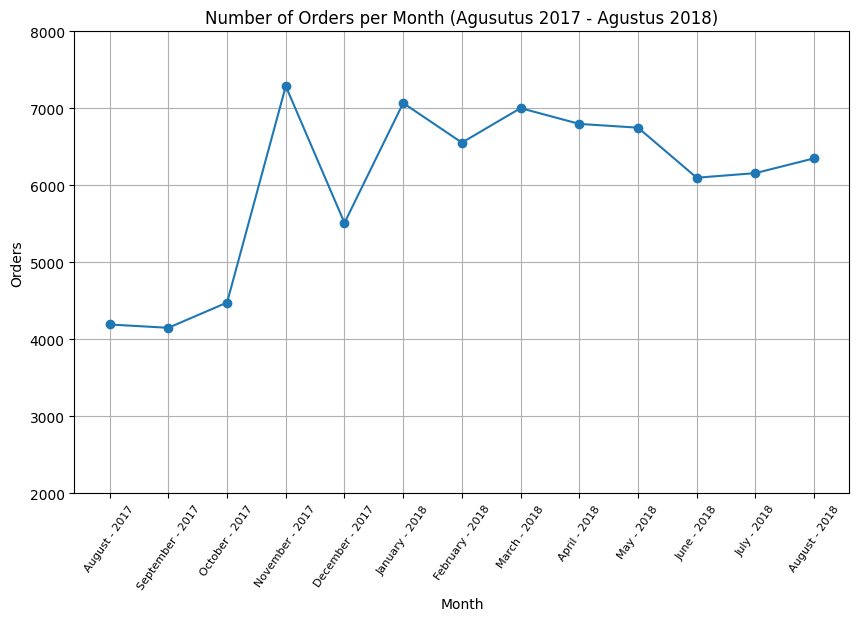

In [ ]:
#Visualisasi tren jumlah pesanan per bulan dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018)
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders_df["Bulan - Tahun"], monthly_orders_df["Jumlah Pesanan"], marker='o', linestyle='-')
plt.title('Number of Orders per Month (Agusutus 2017 - Agustus 2018)')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.ylim(2000, 8000)
plt.xticks(rotation=55, fontsize=8)
plt.grid(True)
plt.show()

Berdasarkan visualisasi diatas selama periode Agustus 2017 hingga Agustus 2018, terlihat tren jumlah pesanan yang menarik. Secara umum, jumlah pesanan cenderung fluktuatif dari bulan ke bulan, menunjukkan adanya faktor-faktor yang memengaruhi permintaan. Terjadi peningkatan awal yang signifikan dari Agustus hingga November 2017, yang bisa disebabkan oleh kesuksesan kampanye pemasaran atau mendekatnya musim liburan. Puncak tertinggi tercatat pada bulan November 2017, ketika jumlah pesanan mencapai puncak sebesar 7289 pesanan. Namun, setelah mencapai puncak pada November 2017, penjualan mengalami penurunan pada bulan Desember 2017 dengan 5513 pesanan, yang terjadi mungkin terkait dengan berakhirnya musim liburan dan penurunan permintaan konsumen.

Selain itu, pola musiman yang jelas terlihat, dengan penjualan cenderung meningkat menjelang akhir tahun (November dan Desember), kemudian menurun pada awal tahun (Januari dan Februari), dan kembali meningkat pada (Maret hingga Mei). Setelah mencapai titik terendah pada Juni 2018, penjualan tampaknya mengalami penurunan yang lebih stabil dan perlahan, yang mungkin terkait dengan perubahan dalam pasar atau persaingan yang lebih ketat.

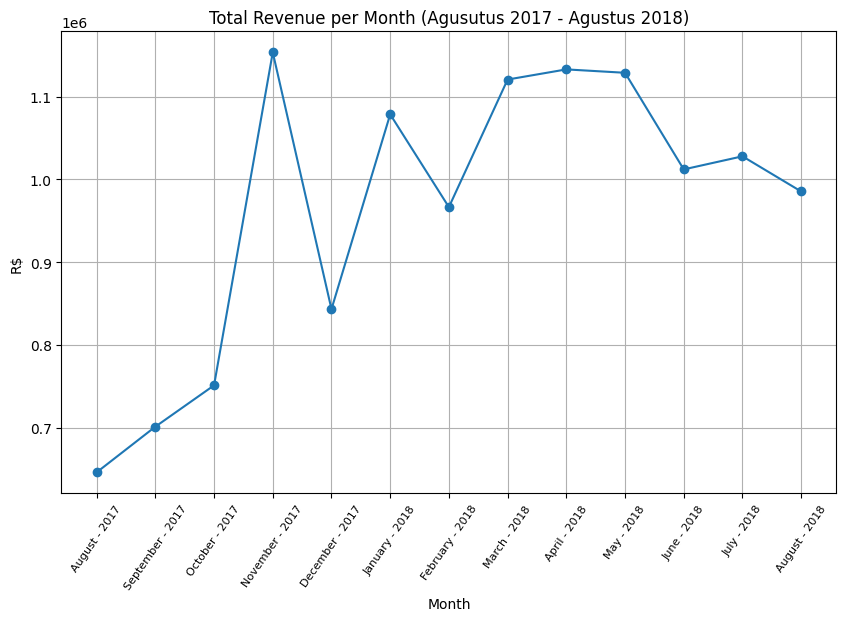

In [ ]:
#Visualisasi tren revenue per bulan dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018)
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders_df["Bulan - Tahun"], monthly_orders_df["Revenue"], marker='o', linestyle='-')
plt.title('Total Revenue per Month (Agusutus 2017 - Agustus 2018)')
plt.xlabel('Month')
plt.ylabel('R$')
plt.xticks(rotation=55, fontsize=8)
plt.grid(True)
plt.show()

Dari visualisasi revenue diatas terdapat beberapa temuan penting yaitu adanya korelasi antara jumlah pesanan dan pendapatan, dengan peningkatan jumlah pesanan cenderung diikuti oleh peningkatan pendapatan. Periode paling signifikan dalam data ini adalah November 2017, pada bulan ini menjadi puncak penjualan dengan jumlah pesanan mencapai 7289 dan pendapatan mencapai R$ 1.153.528,05. Hal ini bisa disebabkan oleh efek liburan. Namun, setelah puncak tersebut, terjadi penurunan pada awal tahun 2018, mengindikasikan pola musiman yang kuat dalam perilaku konsumen selama musim liburan dan awal tahun. Setelahnya, pendapatan mulai pulih pada awal musim semi. Selanjutnya, terlihat penurunan yang lebih stabil setelah mencapai puncak pendapatan pada April 2018. Analisis ini dapat menjadi dasar untuk perencanaan bisnis yang lebih baik, termasuk strategi pemasaran dan pengelolaan persediaan untuk mengatasi fluktuasi musiman dan mengoptimalkan pendapatan. Selain itu, perlu dilakukan analisis lebih lanjut terkait dengan faktor-faktor eksternal seperti kondisi ekonomi dan persaingan pasar yang dapat memengaruhi tren pesanan dan pendapatan.

## Pertanyaan 2 : Dalam konteks waktu pemesanan, bagaimana perilaku sebagian besar pelanggan melakukan pemesanan dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?

### Distribusi Jumlah Pesanan dalam Satu Bulan

In [ ]:
date_df = pd.DataFrame({'order_purchase_timestamp': filter_year['order_purchase_timestamp']})

# Ekstrak informasi tanggal
date_df['year'] = date_df['order_purchase_timestamp'].dt.year
date_df['month'] = date_df['order_purchase_timestamp'].dt.month
date_df['day'] = date_df['order_purchase_timestamp'].dt.day

# Fungsi untuk menggolongkan tanggal
def classify_day_of_month(day):
    if day <= 10:
        return 'Awal Bulan'
    elif day <= 20:
        return 'Pertengahan Bulan'
    else:
        return 'Akhir Bulan'

date_df['day_partition'] = date_df['day'].apply(classify_day_of_month)
partition_counts = date_df['day_partition'].value_counts()
partition_counts

Pertengahan Bulan    27711
Awal Bulan           27174
Akhir Bulan          26647
Name: day_partition, dtype: int64

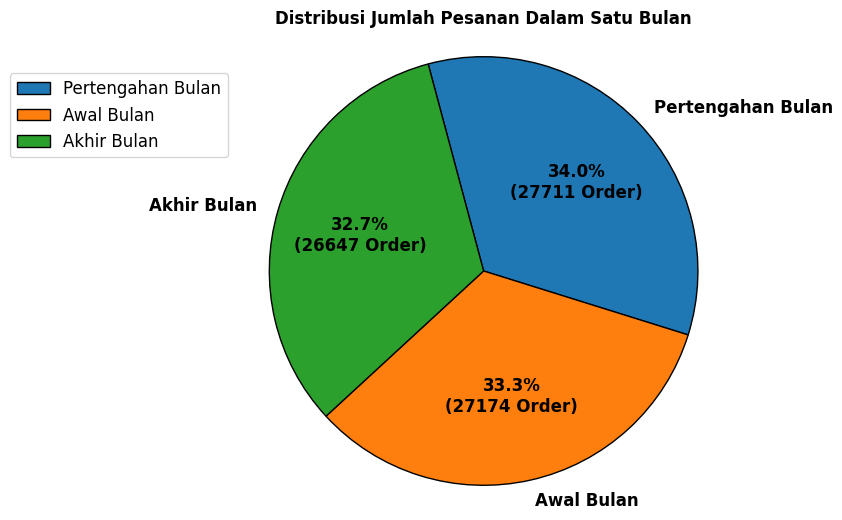

In [ ]:
labels = partition_counts.index
percentages = ['{:.1f}%'.format((length / sum(partition_counts)) * 100) for length in partition_counts]
data_labels = [f'{percentage}\n({length} Order)' for percentage, length in zip(percentages, partition_counts)]

fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(partition_counts, labels=partition_counts.index, autopct='',
                                   wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=False, startangle=105,
                                   radius=1.3, textprops={'fontsize': 12, 'weight': 'bold'})

for i, autotext in enumerate(autotexts):
    autotext.set_text(data_labels[i])

plt.tight_layout()
plt.title('Distribusi Jumlah Pesanan Dalam Satu Bulan', y=1.08, fontweight='bold')
plt.legend(labels, loc=0, bbox_to_anchor=(-0.1, 1), fontsize=12)
plt.show()

Berdasarkan data diatas didapatkan bahwa perilaku konsumen dalam membeli produk berdasarkan periode dalam satu bulan terjadi keseimbangan atau bisa dikatakan cukup merata dengan rata-rata 30% disetiap periodenya. Berdasarkan data pembelian produk pada awal, pertengahan, dan akhir bulan yang Anda berikan, terlihat adanya pola yang menunjukkan perbedaan dalam perilaku konsumen sepanjang bulan. Pada awal bulan dengan persentase 33.3%, jumlah pembelian cenderung sedikit lebih tinggi daripada akhir bulan, namun masih lebih rendah daripada pada pertengahan bulan. Ini mungkin mencerminkan adanya faktor pengaruh gaji atau pendapatan awal bulan serta potongan harga awal bulan yang menarik bagi konsumen. Di pertengahan bulan dengan persentase 34%, terjadi lonjakan signifikan dalam pembelian produk, yang mungkin dipicu oleh ketersediaan dana lebih setelah menerima gaji pertengahan bulan. Pada akhir bulan 32.7%, terlihat penurunan dalam pembelian, mungkin karena konsumen cenderung lebih hati-hati dengan pengeluaran mereka saat mendekati akhir bulan setelah menghadapi berbagai kewajiban finansial.

### Rekap Jumlah Order Berdasarkan Hari dalam Seminggu pada Periode (Agustus 2017 - Agustus 2018)

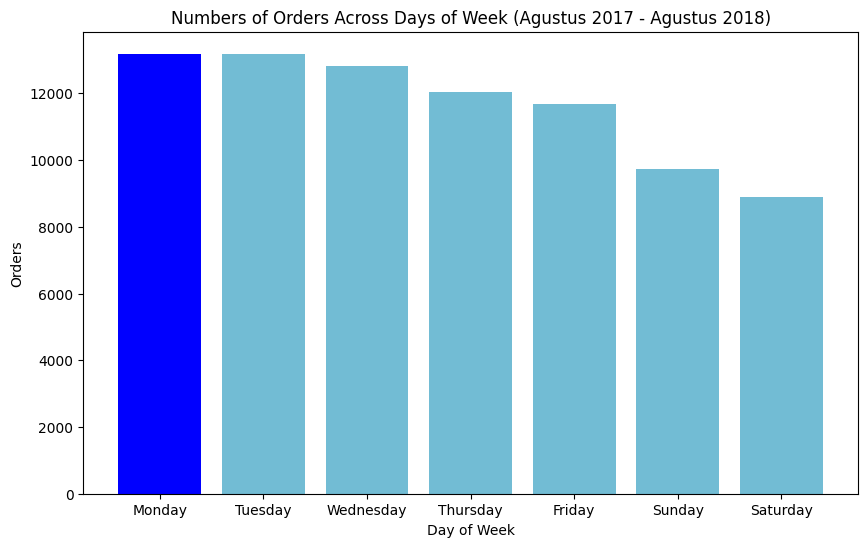

In [ ]:
hari = filter_year['order_purchase_timestamp'].dt.day_name().value_counts()
plt.figure(figsize=(10, 6))
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.bar(hari.index, hari.values, color=colors)
plt.title('Numbers of Orders Across Days of Week (Agustus 2017 - Agustus 2018)')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
#plt.xticks(rotation=45)
plt.show()

Berdasarkan data penjualan per hari, kita dapat mengamati beberapa pola dalam perilaku pembelian konsumen. Hari Senin dan Selasa menunjukkan jumlah pesanan tertinggi, dengan kemungkinan adanya hubungan dengan awal minggu kerja, di mana banyak orang cenderung lebih termotivasi dan memiliki energi setelah akhir pekan untuk melakukan pembelian. Untuk strategi penjualan, ini bisa menjadi waktu yang baik untuk menawarkan promosi atau penawaran khusus guna memanfaatkan lonjakan aktivitas pembelian. Namun, pada pertengahan minggu, terjadi penurunan pesanan, yang mungkin dikaitkan dengan fokus konsumen pada pekerjaan dan rutinitas sehari-hari mereka. Perusahaan dapat mempertimbangkan upaya lebih besar untuk memancing minat konsumen pada hari-hari ini. Pada akhir pekan, jumlah pesanan lebih rendah, kemungkinan karena orang-orang lebih cenderung menghabiskan waktu luang mereka dan berpartisipasi dalam kegiatan sosial. Meskipun begitu, perusahaan tetap memiliki peluang untuk merancang promosi akhir pekan atau penawaran spesial yang dapat menarik konsumen yang ingin berbelanja selama liburan atau waktu luang mereka. Penting juga untuk melakukan analisis lebih mendalam dan mengumpulkan data tambahan untuk memahami faktor-faktor yang memengaruhi perilaku pembelian konsumen pada hari-hari tertentu dengan lebih rinci.

### Rekap Jumlah Order Berdasarkan Kategori Waktu pada Periode (Agustus 2017 - Agustus 2018)

In [ ]:
def categorize_time_of_day(order_purchase_timestamp):
    hour = order_purchase_timestamp.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 20:
        return 'evening'
    else:
        return 'night'

filter_year['time_of_day'] = filter_year['order_purchase_timestamp'].apply(categorize_time_of_day)


<ipython-input-127-6f8ccb51c7f0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_year['time_of_day'] = filter_year['order_purchase_timestamp'].apply(categorize_time_of_day)


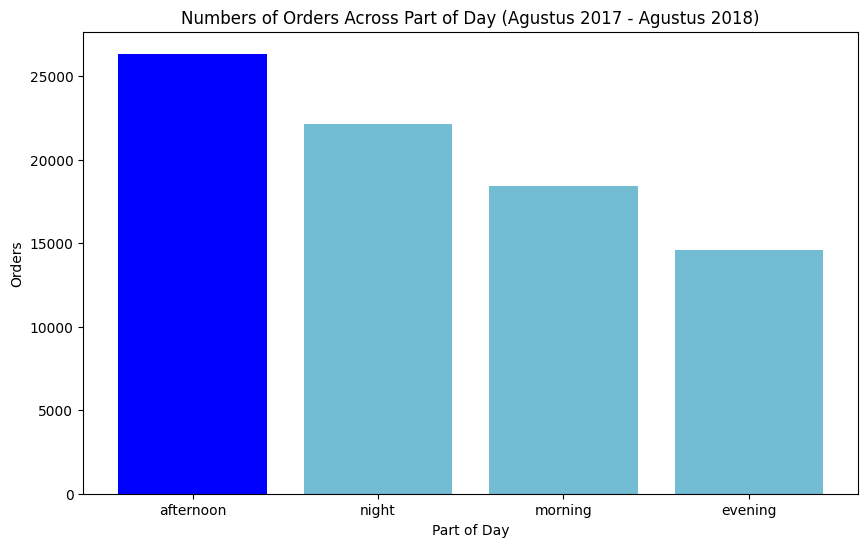

In [ ]:
jam = filter_year.time_of_day.value_counts()
plt.figure(figsize=(10, 6))
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.bar(jam.index, jam.values, color = colors )
plt.title('Numbers of Orders Across Part of Day (Agustus 2017 - Agustus 2018)')
plt.xlabel('Part of Day')
plt.ylabel('Orders')
plt.show()

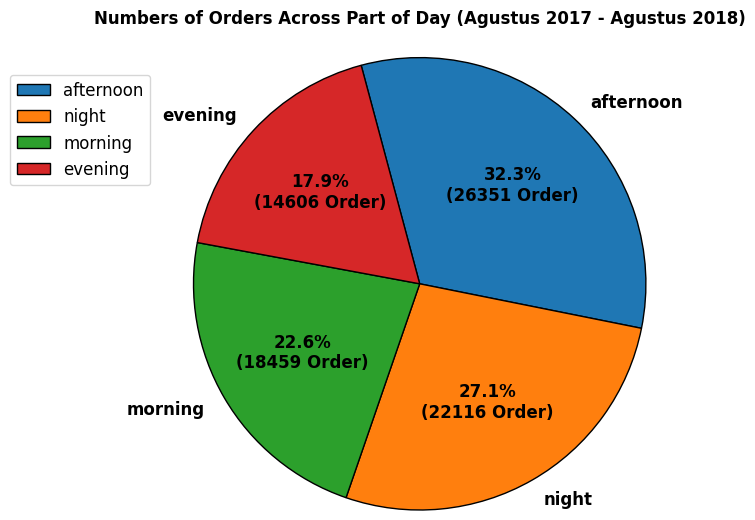

In [ ]:
labels = jam.index
percentages = ['{:.1f}%'.format((length / sum(jam)) * 100) for length in jam]
data_labels = [f'{percentage}\n({length} Order)' for percentage, length in zip(percentages, jam)]

fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(jam, labels=jam.index, autopct='',
                                   wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=False, startangle=105,
                                   radius=1.3, textprops={'fontsize': 12, 'weight': 'bold'})

for i, autotext in enumerate(autotexts):
    autotext.set_text(data_labels[i])

plt.tight_layout()
plt.title('Numbers of Orders Across Part of Day (Agustus 2017 - Agustus 2018)', y=1.08, fontweight='bold')
plt.legend(labels, loc=0, bbox_to_anchor=(-0.1, 1), fontsize=12)
plt.show()

Berdasarkan data pembelian produk berdasarkan jam pembelian produk menunjukkan pola yang menarik dalam perilaku konsumen. Terlihat bahwa puncak pembelian terjadi pada siang hari, dengan jumlah pesanan tertinggi mencapai 26351. Ini mungkin terkait dengan waktu istirahat makan siang atau waktu luang di tengah hari, ketika banyak orang cenderung memutuskan untuk berbelanja. Perusahaan dapat memanfaatkan informasi ini untuk merancang strategi penjualan yang lebih efektif pada jam-jam ini dan memastikan stok yang mencukupi untuk menghadapi peningkatan permintaan. Selain itu, pembelian pada malam hari juga cukup signifikan, dengan 22116 pesanan, yang bisa terkait dengan waktu luang setelah bekerja. Ini memberikan peluang bagi perusahaan untuk menyesuaikan jadwal operasional dan menawarkan penawaran khusus pada jam-jam tersebut. Meskipun pembelian pada pagi hari dan sore hari lebih rendah, perusahaan tetap dapat mempertimbangkan upaya khusus untuk memancing minat konsumen pada waktu-waktu ini dengan penawaran eksklusif atau layanan pengiriman yang cepat. Analisis lebih lanjut berdasarkan jenis produk atau layanan yang ditawarkan dapat memberikan wawasan tambahan untuk merancang strategi penjualan yang lebih efektif.

### Rata - Rata Jumlah Pesanan Berdasarkan Waktu

In [ ]:
date_df = pd.DataFrame({'order_purchase_timestamp': filter_year['order_purchase_timestamp']})

# Rata-rata Pesanan per Hari
average_orders_per_day = date_df['order_purchase_timestamp'].dt.date.value_counts().mean()

# Rata-rata Pesanan per Minggu
average_orders_per_week = date_df['order_purchase_timestamp'].dt.strftime('%Y-%U').value_counts().mean()

# Rata-rata Pesanan per Bulan
average_orders_per_month = date_df['order_purchase_timestamp'].dt.strftime('%Y-%m').value_counts().mean()

# Tampilkan hasil
print("Rata-rata Pesanan per Hari:", average_orders_per_day)
print("Rata-rata Pesanan per Minggu:", average_orders_per_week)
print("Rata-rata Pesanan per Bulan:", average_orders_per_month)

Rata-rata Pesanan per Hari: 206.93401015228426
Rata-rata Pesanan per Minggu: 1405.7241379310344
Rata-rata Pesanan per Bulan: 6271.692307692308


## Pertanyaan 3 : Bagaimana tren penjualan produk (Quantity Sold) selama satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?

In [ ]:
#Memilih Data Jumlah Pesanan Satu Tahun Terakhir Periode (Agustus 2017 - Agustus 2018)
filter_tahun = orders_customers_items_products_df[
    (orders_customers_items_products_df['order_purchase_timestamp'] >= '2017-08-01') &
    (orders_customers_items_products_df['order_purchase_timestamp'] <= '2018-08-30')
]
filter_tahun

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
filter_tahun['bulan_pembelian'] = filter_tahun['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp('M')
products_qty = filter_tahun['bulan_pembelian'].value_counts().reset_index()
products_qty.columns = ['Bulan - Tahun', 'Jumlah Produk']
products_qty = products_qty.sort_values(by='Bulan - Tahun')
products_qty['Bulan - Tahun'] = pd.to_datetime(products_qty['Bulan - Tahun']).dt.strftime('%B - %Y')
products_qty

<ipython-input-132-8762d8096a1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_tahun['bulan_pembelian'] = filter_tahun['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp('M')


,Bulan - Tahun,Jumlah Produk
11,August - 2017,4797
12,September - 2017,4737
10,October - 2017,5214
0,November - 2017,8475
9,December - 2017,6187
1,January - 2018,8037
5,February - 2018,7518
2,March - 2018,8017
3,April - 2018,7827
4,May - 2018,7810


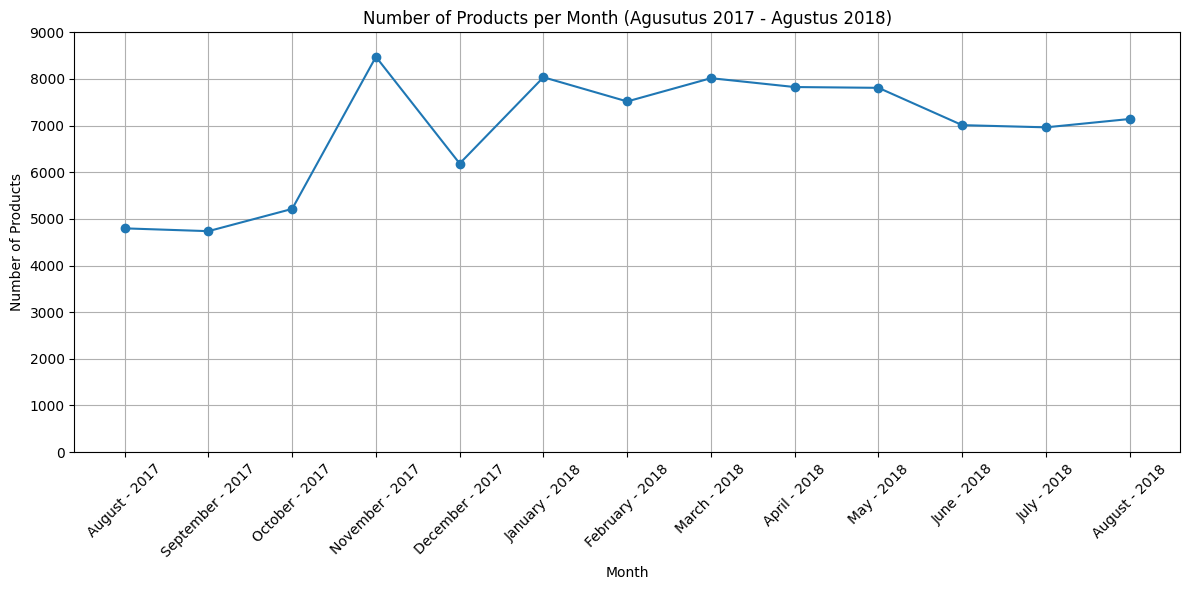

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(products_qty['Bulan - Tahun'], products_qty['Jumlah Produk'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Products')
plt.title('Number of Products per Month (Agusutus 2017 - Agustus 2018)')
plt.grid(True)
plt.ylim(0, 9000)
plt.tight_layout()
plt.show()

Dari data jumlah produk yang terjual selama periode Agustus 2017 hingga Agustus 2018 menggambarkan berbagai aspek performa bisnis dalam jangka waktu tersebut. Terlihat bahwa selama tahun ini, bisnis ini mengalami pertumbuhan yang positif dengan peningkatan jumlah produk terjual dari bulan ke bulan. Puncak penjualan terjadi pada bulan November 2017, mencapai 8475 produk, yang kemungkinan dipicu oleh peningkatan aktivitas belanja selama musim liburan. Namun, ada juga fluktuasi dalam penjualan, yang mungkin dipengaruhi oleh faktor musiman atau promosi khusus. Meskipun demikian, menunjukkan konsistensi dalam mencapai jumlah produk terjual yang relatif tinggi sepanjang tahun terakhir. Hal ini memberikan optimisme untuk masa depan, dengan potensi untuk meningkatkan strategi pemasaran dan promosi pada bulan-bulan yang mengalami penurunan penjualan

## Pertanyaan 4 : Produk apa yang paling banyak dan paling sedikit terjual dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) ?

In [ ]:
#Memilih Data  Satu Tahun Terakhir Periode (Agustus 2017 - Agustus 2018)
filter_tahun_produk = orders_customers_items_products_df[
    (orders_customers_items_products_df['order_purchase_timestamp'] >= '2017-08-01') &
    (orders_customers_items_products_df['order_purchase_timestamp'] <= '2018-08-30')
]
filter_tahun_produk

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
filter_tahun_produk.product_category_name.value_counts().head(10)

bed_bath_table           8893
health_beauty            7952
sports_leisure           6849
furniture_decor          6340
computers_accessories    6315
housewares               5427
watches_gifts            5227
auto                     3519
telephony                3473
garden_tools             3454
Name: product_category_name, dtype: int64

In [ ]:
filter_tahun_produk.product_category_name.value_counts().tail(10)

fashio_female_clothing             26
home_comfort_2                     22
arts_and_craftmanship              22
fashion_sport                      15
portable_kitchen_food_preparers    14
cds_dvds_musicals                   9
la_cuisine                          8
fashion_childrens_clothes           5
pc_gaming                           4
security_and_services               1
Name: product_category_name, dtype: int64

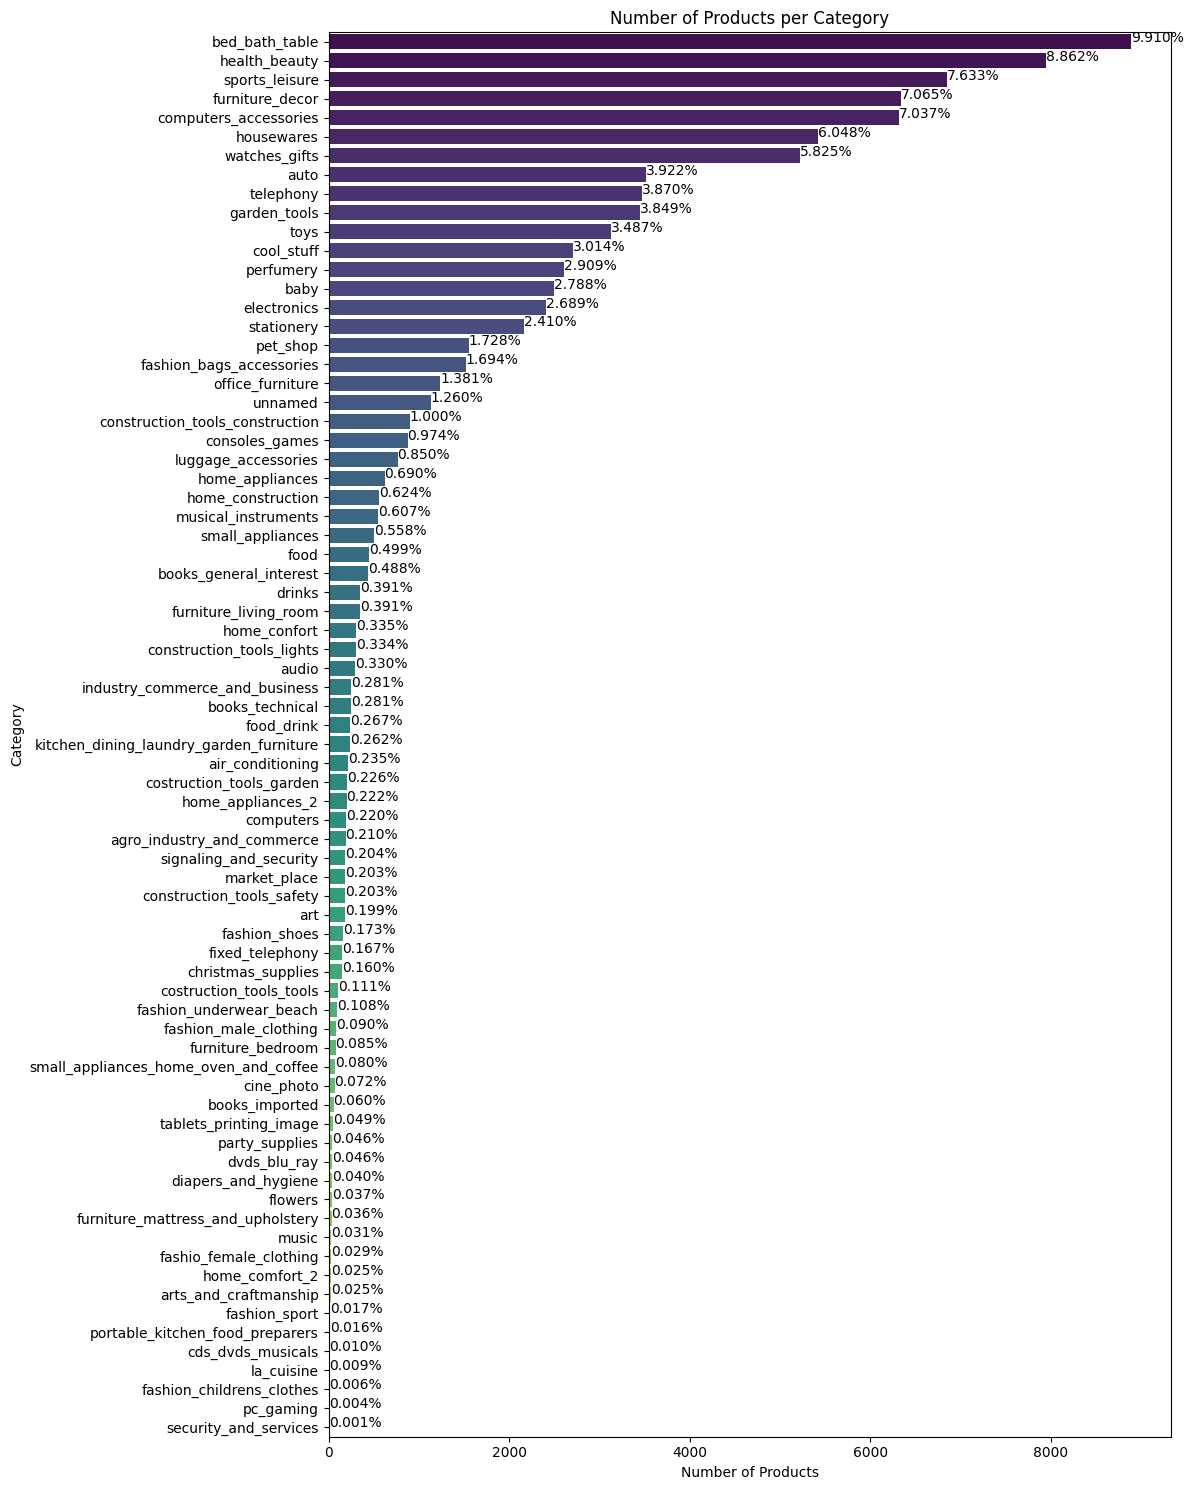

In [ ]:
# Menghitung jumlah produk berdasarkan kategori produk
kategori_produk_jumlah = filter_tahun_produk['product_category_name'].value_counts().reset_index()
kategori_produk_jumlah.columns = ['Kategori Produk', 'Jumlah']

# Membuat bar chart
plt.figure(figsize=(12, 15))
ax = sns.barplot(x='Jumlah', y='Kategori Produk', data=kategori_produk_jumlah, palette='viridis')

# Menambahkan persentase pada setiap bar
for p in ax.patches:
    percentage = '{:.3f}%'.format((p.get_width() / kategori_produk_jumlah['Jumlah'].sum()) * 100)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Menambahkan label
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.title('Number of Products per Category')

# Menampilkan plot
plt.tight_layout()
plt.show()


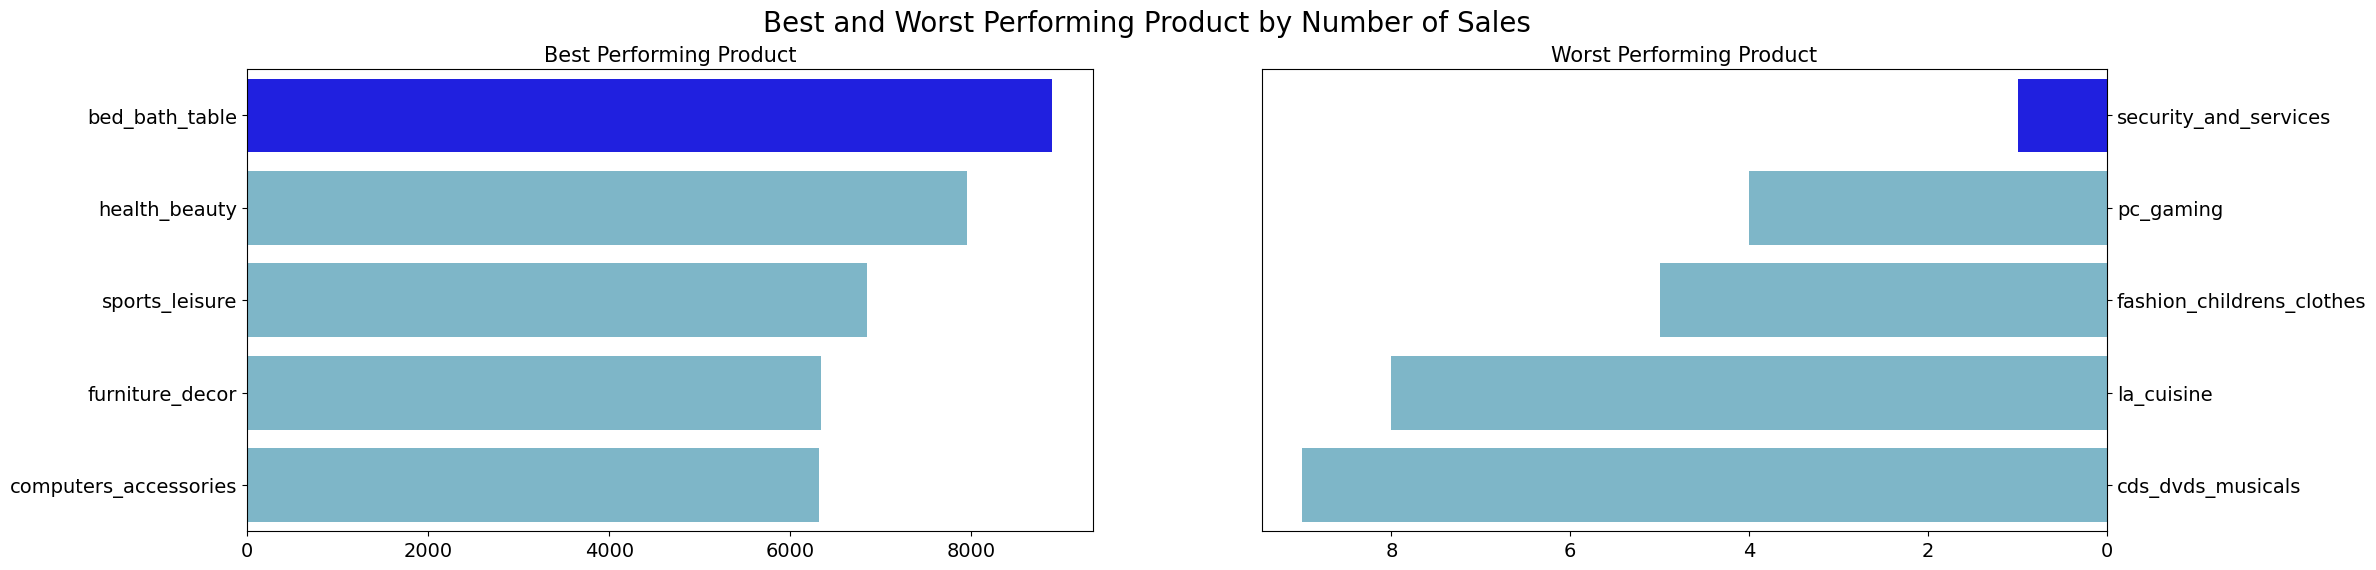

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="Jumlah", y="Kategori Produk", data=kategori_produk_jumlah.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=14)
ax[0].tick_params(axis='x', labelsize=14)  # Memperbesar angka pada sumbu-x

sns.barplot(x="Jumlah", y="Kategori Produk", data=kategori_produk_jumlah.sort_values(by="Jumlah", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)  # Memperbesar angka pada sumbu-x

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


Data kategori produk yang terlaris dan tidak terlaris memberikan gambaran yang menarik tentang performa berbagai jenis produk dalam bisnis ini.

Kategori Produk Terlaris:
Sepuluh kategori produk terlaris mencakup beragam kebutuhan konsumen. Kategori seperti "Bed & Bath Table" (8893 unit) dan "Health & Beauty" (7952 unit) menunjukkan bahwa produk-produk perawatan kesehatan dan perlengkapan tidur sangat diminati oleh pelanggan. "Sports & Leisure" (6849 unit) dan "Furniture & Decor" (6340 unit) juga memiliki pangsa pasar yang kuat, menunjukkan minat yang besar dalam produk-produk untuk olahraga dan dekorasi rumah. Kategori "Computers & Accessories" (6315 unit) dan "Housewares" (5427 unit) menunjukkan tingginya minat dalam perangkat komputer dan peralatan rumah tangga. Selain itu, "Watches & Gifts" (5227 unit) dan "Auto" (3519 unit) adalah produk yang juga diminati oleh pelanggan.

Kategori Produk Tidak Terlaris:
Di sisi lain, sepuluh kategori produk yang tidak terlaris menunjukkan beberapa area yang mungkin perlu lebih diperhatikan dalam strategi pemasaran. Kategori seperti "Fashion Female Clothing" (26 unit) dan "Home Comfort" (22 unit) mengalami penjualan yang rendah, dan mungkin memerlukan peninjauan ulang dalam penawaran produk dan strategi pemasaran. Demikian juga, "Arts & Craftsmanship" (22 unit) dan "Fashion Sport" (15 unit) memiliki pangsa pasar yang lebih kecil. Beberapa kategori seperti "CDs, DVDs, Musicals" (9 unit), "La Cuisine" (8 unit), "Fashion Children's Clothes" (5 unit), "PC Gaming" (4 unit), dan "Security & Services" (1 unit) juga menunjukkan penjualan yang sangat rendah.

Analisis data kategori produk ini dapat membantu bisnis untuk lebih memahami preferensi pelanggan dan merancang strategi yang lebih baik untuk meningkatkan penjualan produk yang kurang laris, serta mempertahankan keunggulan produk yang terlaris. Dengan demikian, pemilik bisnis dapat mengoptimalkan portofolio produk mereka dan mengambil tindakan yang sesuai untuk mengatasi perbedaan dalam performa produk.

## Pertanyaan 5 : Bagaimana penjualan dan revenue dalam satu tahun terakhir periode (Agustus 2017 - Agustus 2018) berdasarkan demografi pelanggan yang kita miliki?

In [ ]:
#Memilih Data  Satu Tahun Terakhir Periode (Agustus 2017 - Agustus 2018)
filter_tahun_revenue = orders_customers_payments_df[
    (orders_customers_payments_df['order_purchase_timestamp'] >= '2017-08-01') &
    (orders_customers_payments_df['order_purchase_timestamp'] <= '2018-08-30')
]

### Jumlah Produk Terjual Berdasarkan State

In [ ]:
state = orders_customers_df.customer_state.value_counts().head(10)
state

SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
Name: customer_state, dtype: int64

In [ ]:
revenue_state = filter_tahun_revenue.groupby('customer_state')['payment_value'].sum().reset_index()
revenue_state = revenue_state.sort_values(by='payment_value', ascending=False)
revenue_state.columns = ['State', 'Revenue']
revenue_state.head(10)

,State,Revenue
25,SP,4750375.49
18,RJ,1641322.58
10,MG,1493693.02
22,RS,690043.21
17,PR,627808.31
23,SC,484602.90
4,BA,474869.26
6,DF,284741.45
8,GO,269671.03
7,ES,262890.08


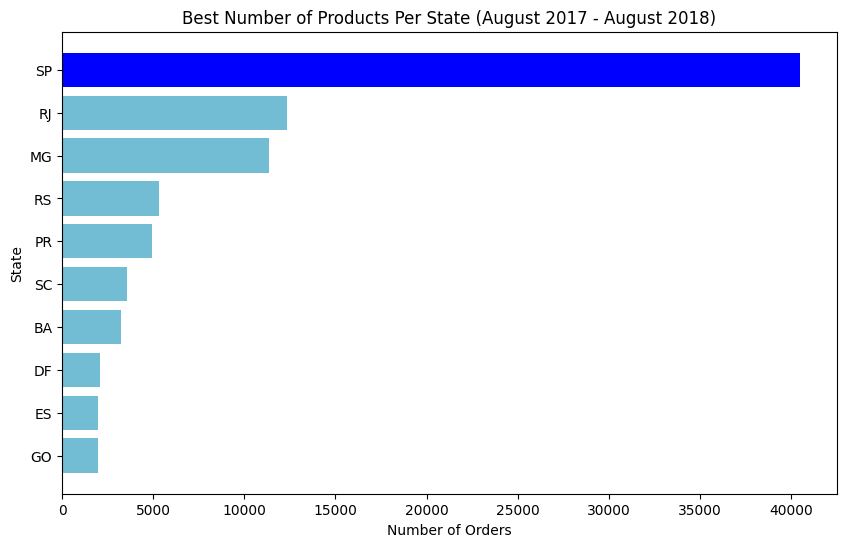

In [ ]:
plt.figure(figsize=(10, 6))
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.barh(state.index, state.values, color = colors)
plt.gca().invert_yaxis()
plt.title('Best Number of Products Per State (August 2017 - August 2018)')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.show()

Dalam data penjualan dan pendapatan (revenue) dari 10 negara bagian (state) yang diberikan, terdapat beberapa insight yang dapat diambil:

1. Sao Paulo (SP) Mengungguli Semua Negara Bagian Lainnya Dalam Penjualan dan Pendapatan:

- Sao Paulo (SP) memimpin dalam penjualan dengan jumlah sebesar 40,501 unit, jauh melampaui negara bagian lainnya.
- Texas (SP) juga mendominasi dalam pendapatan dengan pendapatan sebesar $4,750,375.49, yang jauh lebih tinggi dibandingkan dengan negara bagian lain.
Korelasi Positif Antara Penjualan dan Pendapatan:

2. Terdapat korelasi positif antara penjualan dan pendapatan.

- Negara bagian dengan penjualan tertinggi cenderung juga memiliki pendapatan tertinggi.
- Hal ini dapat mengindikasikan bahwa konsumen di negara bagian tersebut cenderung membeli produk atau layanan dalam jumlah besar, yang berdampak positif pada pendapatan perusahaan.

3. Rio de Janeiro (RJ) dan Minas Gerais (MG) Memiliki Peringkat Kedua Tertinggi:

- Rio de Janeiro (RJ) memiliki penjualan terbesar kedua dengan 12,350 unit, dan juga pendapatan kedua tertinggi dengan Real Brazil 1,641,322.58.
- Minas Gerais (MG) menduduki peringkat ketiga dalam penjualan dengan 11,354 unit, dan juga peringkat ketiga dalam pendapatan dengan R$ 1,493,693.02.
- Ini menunjukkan bahwa kedua negara bagian ini memiliki pangsa pasar yang kuat dan mungkin merupakan target yang menarik bagi perusahaan untuk memperluas operasi atau strategi pemasarannya.

4. Disparitas Pendapatan antara Texas (SP) dan Negara Bagian Lainnya:

- Terdapat disparitas yang signifikan dalam pendapatan antara Texas (SP) dan negara bagian lainnya. Texas memiliki pendapatan lebih dari 4 juta dollar, sedangkan negara bagian lainnya berada dalam kisaran ratusan ribu dollar.
- Hal ini menunjukkan pentingnya Texas dalam menghasilkan pendapatan bagi perusahaan, dan ini mungkin menjadi fokus utama strategi pertumbuhan.

5. Pertimbangan Potensial untuk Ekspansi atau Peningkatan Pemasaran:

- Negara bagian seperti Bahia (BA), Distrito Federal (DF), dan Espirito Santo (ES) memiliki penjualan dan pendapatan yang lebih rendah daripada negara bagian lainnya.
- Ini mungkin menjadi peluang untuk mempertimbangkan strategi ekspansi atau peningkatan pemasaran di negara bagian-negara bagian ini untuk meningkatkan penjualan dan pendapatan.

### Jumlah Customer Berdasarkan State

In [ ]:
state_customer = orders_customers_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
state_customer = state_customer.sort_values(by="customer_unique_id", ascending=False)
state_customer.columns = ['State', 'Jumlah Customer']
state_customer.head(10)

,State,Jumlah Customer
25,SP,39156
18,RJ,11917
10,MG,11001
22,RS,5168
17,PR,4769
23,SC,3449
4,BA,3158
6,DF,2019
7,ES,1928
8,GO,1895


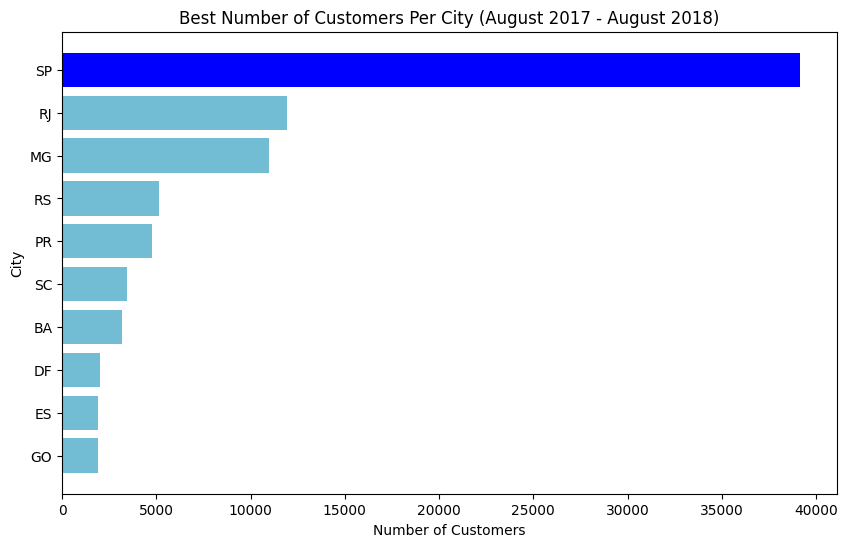

In [ ]:
plt.figure(figsize=(10, 6))
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.barh(state_customer["State"].head(10), state_customer["Jumlah Customer"].head(10), color = colors)
plt.gca().invert_yaxis()
plt.title('Best Number of Customers Per City (August 2017 - August 2018)')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

### Jumlah Produk Terjual Berdasarkan Kota

In [ ]:
city = orders_customers_df.customer_city.value_counts().head(10)
city

sao paulo                15045
rio de janeiro            6601
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1342
salvador                  1188
guarulhos                 1144
sao bernardo do campo      911
Name: customer_city, dtype: int64

In [ ]:
revenue_state = filter_tahun_revenue.groupby('customer_city')['payment_value'].sum().reset_index()
revenue_state = revenue_state.sort_values(by='payment_value', ascending=False)
revenue_state.columns = ['City', 'Revenue']
revenue_state.head(10)

,City,Revenue
3286,sao paulo,1752745.04
2879,rio de janeiro,891053.43
417,belo horizonte,339322.29
515,brasilia,284716.35
1054,curitiba,198049.69
651,campinas,175265.72
2701,porto alegre,173233.90
2962,salvador,165391.33
1402,guarulhos,127169.62
2248,niteroi,114358.61


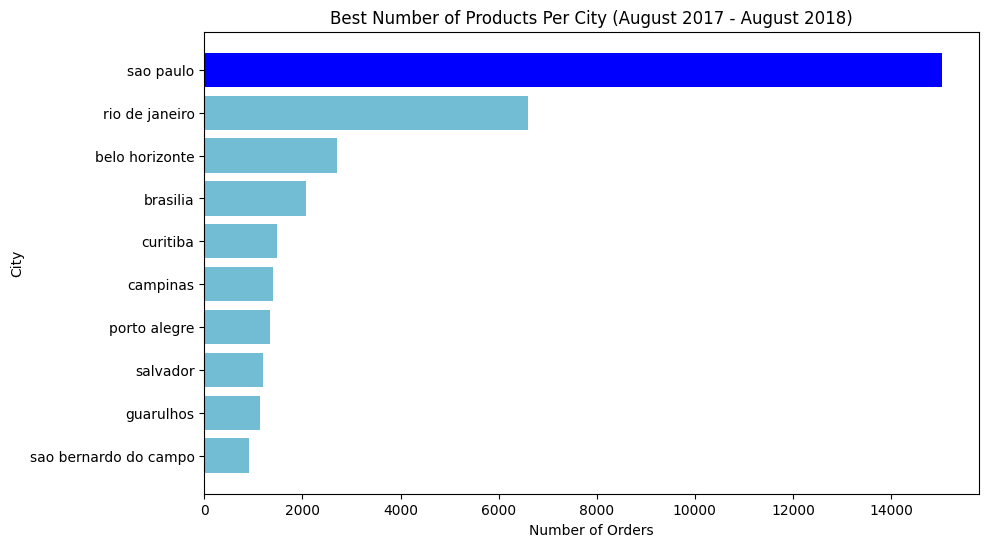

In [ ]:
plt.figure(figsize=(10, 6))
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.barh(city.index, city.values, color = colors)
plt.gca().invert_yaxis()
plt.title('Best Number of Products Per City (August 2017 - August 2018)')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.show()

Dalam data penjualan terbanyak dan pendapatan tertinggi di beberapa kota di Brasil, kita dapat melihat beberapa pola dan informasi yang menarik.

1. Sao Paulo Memimpin dalam Penjualan dan Pendapatan
   
   Kota Sao Paulo mencatatkan penjualan terbanyak dan pendapatan tertinggi. Dengan penjualan sebesar 15,045 unit dan pendapatan sekitar 1,752,745.04 unit mata uang lokal, Sao Paulo jelas merupakan pusat ekonomi yang kuat di Brasil. Ini mungkin dikarenakan populasi yang besar dan beragam, serta menjadi pusat bisnis dan industri.

2. Rio de Janeiro Menyusul dengan Penjualan dan Pendapatan yang Signifikan

   Rio de Janeiro berada di posisi kedua dalam hal penjualan dan pendapatan. Penjualan mencapai 6,601 unit, dan pendapatan mencapai R$ 891,053.43 . Kota ini dikenal sebagai destinasi wisata populer dan memiliki ekonomi yang cukup kuat.

3. Belo Horizonte dan Brasilia dalam Peringkat Ketiga dan Keempat

   Belo Horizonte dan Brasilia masing-masing berada di peringkat ketiga dan keempat dalam kedua kategori penjualan dan pendapatan. Hal ini menunjukkan bahwa keduanya memiliki pasar yang cukup besar dan mampu menghasilkan pendapatan yang signifikan dari penjualan produk atau layanan.

4. Korelasi antara Penjualan dan Pendapatan

   Ada korelasi yang kuat antara penjualan dan pendapatan, di mana kota-kota dengan penjualan tertinggi juga cenderung memiliki pendapatan tertinggi. Ini mengindikasikan bahwa ada permintaan yang tinggi untuk produk atau layanan di kota-kota ini, yang berdampak positif pada pendapatan.

5. Kota dengan Pendapatan Tertinggi Tidak Selalu yang Terbanyak Penjualannya:
   
   Perlu dicatat bahwa ada beberapa perbedaan antara daftar kota dengan penjualan terbanyak dan pendapatan tertinggi. Kota seperti Salvador, Guarulhos, dan Sao Bernardo do Campo tidak termasuk dalam daftar 10 besar penjualan terbanyak, tetapi mereka muncul dalam daftar 10 besar pendapatan tertinggi. Hal ini menunjukkan bahwa meskipun penjualan mereka mungkin tidak sebanyak kota lain, mereka mampu menghasilkan pendapatan yang tinggi per unit produk atau layanan.

Dari data ini, perusahaan dapat mengambil wawasan strategis. Mereka dapat fokus pada kota-kota dengan penjualan terbanyak untuk mengoptimalkan volume penjualan, atau mengarahkan upaya mereka pada kota-kota dengan pendapatan tinggi per unit untuk meningkatkan profitabilitas. Selain itu, ini juga memberikan gambaran tentang dinamika ekonomi di berbagai kota di Brasil, yang dapat menjadi informasi penting bagi perencanaan bisnis dan strategi ekspansi.

### Jumlah Customer Berdasarkan Kota

In [ ]:
city_customer = orders_customers_df.groupby(by="customer_city").customer_unique_id.nunique().reset_index()
city_customer = city_customer.sort_values(by="customer_unique_id", ascending=False)
city_customer.columns = ['City', 'Jumlah Customer']
city_customer.head(10)

,City,Jumlah Customer
3563,sao paulo,14528
3126,rio de janeiro,6361
449,belo horizonte,2606
553,brasilia,2013
1135,curitiba,1434
700,campinas,1363
2936,porto alegre,1292
3218,salvador,1154
1518,guarulhos,1111
3398,sao bernardo do campo,881


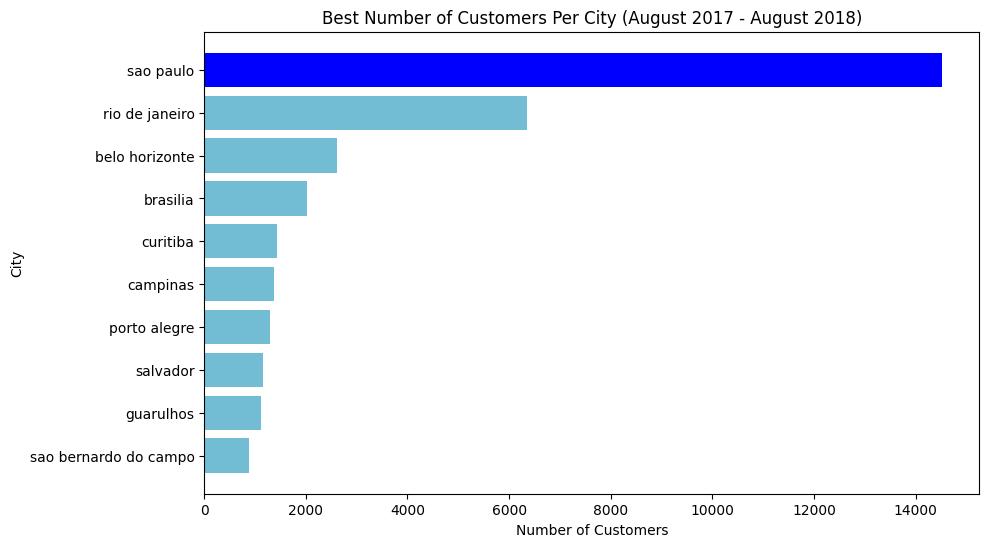

In [ ]:
plt.figure(figsize=(10, 6))
city_customer_sort = city_customer.head(10)
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.barh(city_customer["City"].head(10), city_customer["Jumlah Customer"].head(10), color = colors)
plt.gca().invert_yaxis()
plt.title('Best Number of Customers Per City (August 2017 - August 2018)')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

### RFM Analysis (*Recency*, *Frequency*, *Monetary*)

In [ ]:
rfm_df = filter_tahun_revenue.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df

,customer_unique_id,order_purchase_timestamp,order_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
3,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89
4,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,1,166.98
...,...,...,...,...
76216,fffa431dd3fcdefea4b1777d114144f2,2017-10-30 20:39:50,1,81.20
76217,fffb09418989a0dbff854a28163e47c6,2017-12-17 19:14:35,1,73.16
76218,fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27 22:36:41,1,167.32
76219,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,84.58


In [ ]:
#Mengganti isi dari kolom customer_unique_id agar mudah di plot
rfm_df['customer_unique_id'] = range(1, len(rfm_df) + 1)

In [ ]:
rfm_df.describe(include="all")

<ipython-input-152-66ce369484b6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include="all")


,customer_unique_id,order_purchase_timestamp,order_id,payment_value
count,76221.000000,76221,76221.000000,76221.000000
unique,NaN,75992,NaN,NaN
top,NaN,2018-07-28 13:11:22,NaN,NaN
freq,NaN,3,NaN,NaN
first,NaN,2017-08-01 00:02:01,NaN,NaN
last,NaN,2018-08-29 15:00:37,NaN,NaN
mean,38111.000000,NaN,1.028667,164.626721
std,22003.251771,NaN,0.192498,221.712145
min,1.000000,NaN,1.000000,9.590000
25%,19056.000000,NaN,1.000000,63.180000


In [ ]:
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
rfm_df

,customer_id,max_order_timestamp,frequency,monetary
0,1,2018-05-10,1,141.90
1,2,2018-05-07,1,27.19
2,3,2017-10-12,1,43.62
3,4,2017-11-14,1,196.89
4,5,2018-04-05,1,166.98
...,...,...,...,...
76216,76217,2017-10-30,1,81.20
76217,76218,2017-12-17,1,73.16
76218,76219,2017-12-27,1,167.32
76219,76220,2017-12-10,1,84.58


In [ ]:
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

recent_date = pd.to_datetime("2018-09-01").date()
rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"]).dt.days

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,1,141.90,114
1,2,1,27.19,117
2,3,1,43.62,324
3,4,1,196.89,291
4,5,1,166.98,149


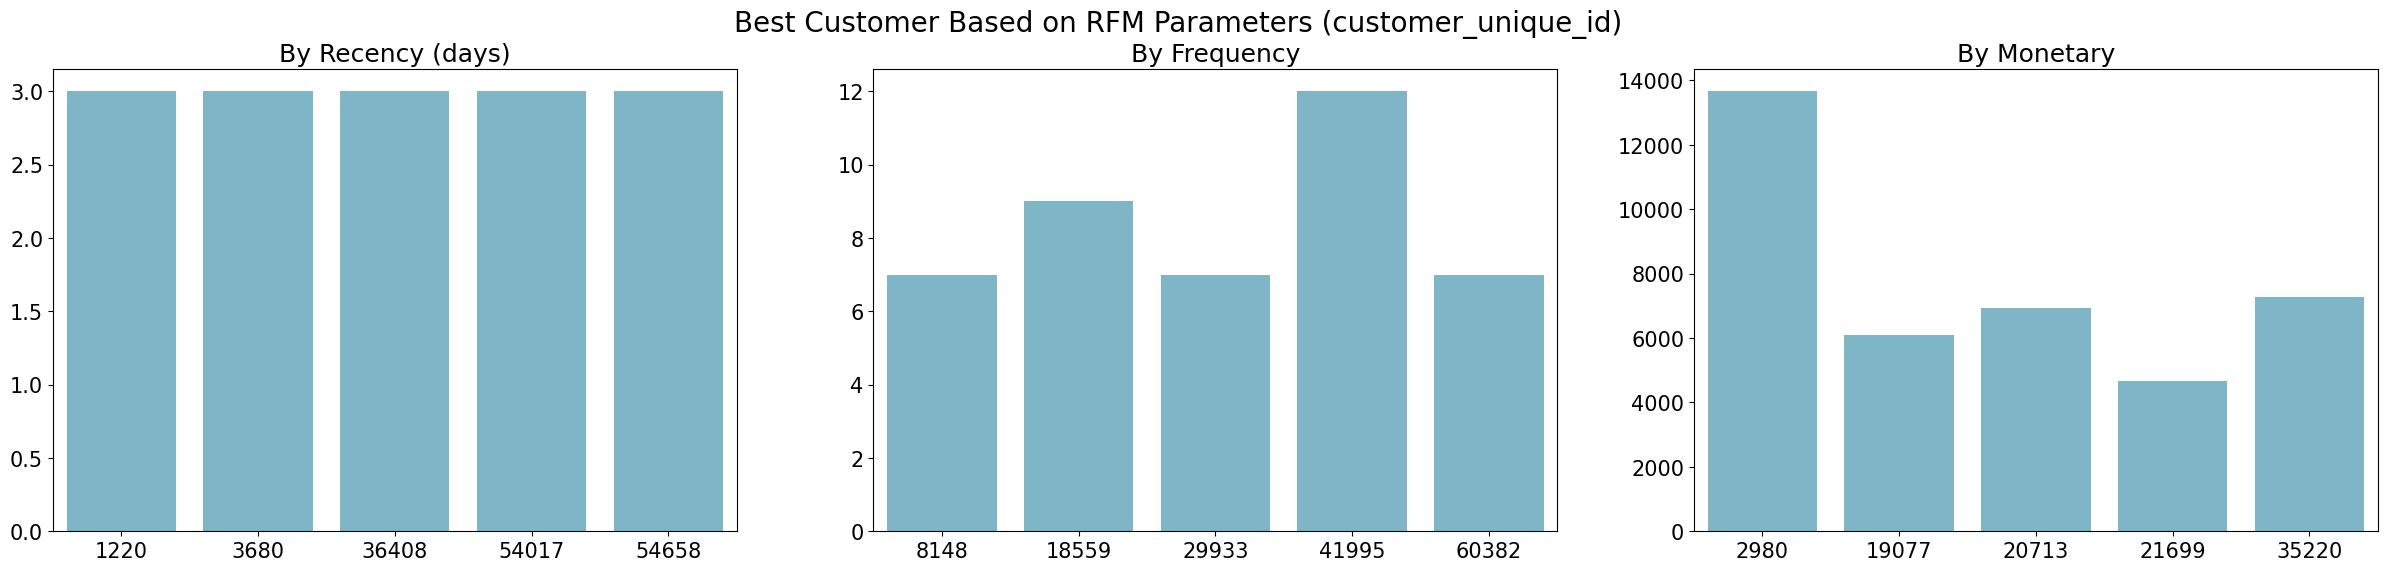

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Subplot 1
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
#ax[0].set_xticklabels(["1", "2", "3", "4", "5"])  # Mengganti label sumbu-x

# Subplot 2
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
#ax[1].set_xticklabels(["1", "2", "3", "4", "5"])  # Mengganti label sumbu-x

# Subplot 3
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis='y', labelsize=15)
#ax[2].set_xticklabels(["1", "2", "3", "4", "5"])  # Mengganti label sumbu-x

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()


In [ ]:
rfm_df_recency = rfm_df.sort_values(by="recency")
rfm_df_recency

,customer_id,frequency,monetary,recency
54657,54658,1,33.23,3
36407,36408,1,73.10,3
54016,54017,1,106.95,3
3679,3680,1,178.25,3
1219,1220,1,119.42,3
...,...,...,...,...
17302,17303,1,1942.60,396
1456,1457,1,172.52,396
27546,27547,1,315.73,396
51615,51616,1,61.00,396


In [ ]:
rfm_df_frequency = rfm_df.sort_values(by="frequency", ascending=False)
rfm_df_frequency

,customer_id,frequency,monetary,recency
41994,41995,12,639.04,12
18558,18559,9,1172.66,186
29932,29933,7,758.83,65
8147,8148,7,959.01,199
60381,60382,7,1122.72,92
...,...,...,...,...
25729,25730,1,69.73,121
25728,25729,1,329.54,174
25727,25728,1,128.72,205
25726,25727,1,118.35,66


In [ ]:
rfm_df_monetary = rfm_df.sort_values(by="monetary", ascending=False)
rfm_df_monetary

,customer_id,frequency,monetary,recency
2979,2980,1,13664.08,337
35219,35220,1,7274.88,48
20712,20713,1,6922.21,38
19076,19077,1,6081.54,281
21698,21699,1,4681.78,71
...,...,...,...,...
12046,12047,1,11.63,307
33211,33212,1,11.63,364
53542,53543,1,10.89,72
56440,56441,1,10.07,353


Dari visualisasi data yang telah disajikan, kita dapat mengidentifikasi sejumlah pelanggan yang memiliki performa terbaik berdasarkan ketiga parameter RFM tersebut. Informasi ini akan menjadi sumber berharga dalam menjawab tiga pertanyaan analisis terakhir yang telah diajukan.

Dalam analisis RFM (Recency, Frequency, Monetary), dapat memahami karakteristik pelanggan-pelanggan ini berdasarkan 3 parameter :

1. Recency (R): Nilai Recency mengukur seberapa baru pelanggan terakhir kali berinteraksi atau melakukan pembelian. Nilai Recency berkisar dari 3 hingga 396 hari. Dimana pada analisa RFM ini, data diambil pada tanggal 1 September 2018 untuk mendapatkan data pada periode Agustus 2017 - Agustus 2018. Didapatkan  Pelanggan dengan Recency terendah (9 hari) adalah pelanggan yang baru-baru ini melakukan pembelian, sedangkan pelanggan dengan Recency tertinggi (396 hari) adalah pelanggan yang telah lama tidak melakukan pembelian. Dalam konteks ini, pelanggan dengan Recency yang rendah mungkin adalah pelanggan yang perlu mendapatkan perhatian lebih dalam upaya pemasaran, sementara pelanggan dengan Recency tinggi mungkin perlu diingatkan kembali lewat promosi.

2. Frequency (F): Nilai Frequency mengukur seberapa sering pelanggan melakukan pembelian atau transaksi. Dalam data ini, Nilai Frequency berkisar dari 12 hingga 1 kali pembelian atau transaksi. Didapatkan nilai Frequency paling tinggi pada 12 kali pembelian yang berarti pelanggan tersebut sudah melakukan 12 pembelian selama periode Agustus 2017 - Agustus 2018 yang dianalisis. Guna menaikkan angka frequency diperlukan strategi promosi untuk mengundang pelanggan agar melakukan pembelian lebih sering.

3. Monetary (M): Nilai Monetary mengukur seberapa banyak uang yang dihabiskan oleh pelanggan dalam bisnis Anda. Nilai Monetary berkisar dari 13,664.08 hingga 9.59 unit mata uang (Dalam hal ini, R$). Pelanggan dengan nilai Monetary yang lebih tinggi adalah pelanggan yang telah menghabiskan lebih banyak uang untuk melakukan pembelian. Dalam hal ini, pelanggan dengan nilai Monetary tertinggi adalah pelanggan paling berharga dari segi pendapatan. Bisnis dapat mempertahankan dan merawat hubungan dengan pelanggan ini untuk memaksimalkan nilai.



Dalam rangka merancang strategi pemasaran yang lebih efektif, analisis RFM dapat membantu bisnis dalam hal berikut:

- Pengelompokan Pelanggan: Bisnis dapat mengelompokkan pelanggan ke dalam segmen-segmen berdasarkan kombinasi nilai Recency, Frequency, dan Monetary. Ini memungkinkan untuk mengidentifikasi pelanggan yang paling berharga, pelanggan yang perlu mendapatkan perhatian lebih, dan pelanggan yang berpotensi lama tidak berinteraksi dengan bisnis.

- Merancang Program Loyalitas: Untuk pelanggan dengan Recency yang tinggi namun Frequency rendah, bisnis dapat merancang program loyalitas atau insentif yang mendorong mereka untuk kembali berinteraksi atau melakukan pembelian.

- Personalisasi Pemasaran: Dengan memahami karakteristik RFM pelanggan, bisnis dapat merancang pesan pemasaran yang lebih personal dan relevan sesuai dengan kebutuhan dan perilaku masing-masing pelanggan.

- Mengukur Kinerja: Bisnis dapat menggunakan analisis RFM untuk mengukur efektivitas upaya pemasaran dan memonitor apakah ada perubahan dalam perilaku pelanggan seiring waktu.

Dengan pemahaman yang lebih baik tentang karakteristik pelanggan melalui analisis RFM, bisnis dapat mengambil tindakan yang lebih tepat untuk memaksimalkan nilai pelanggan, meningkatkan loyalitas, dan mengoptimalkan pendapatan.

### Metode Pembayaran

In [ ]:
filter_tahun_revenue.payment_type.value_counts()

credit_card    60817
boleto         15302
voucher         4081
debit_card      1332
Name: payment_type, dtype: int64

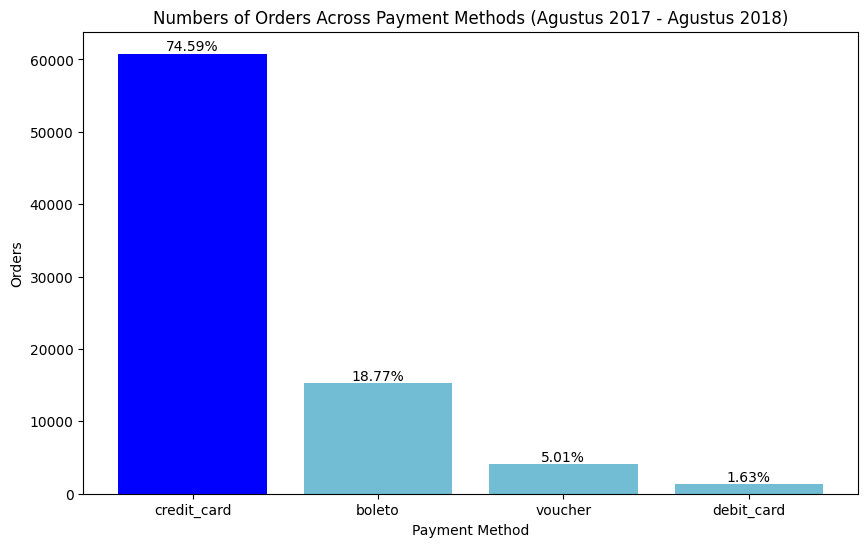

In [ ]:
method_payment = filter_tahun_revenue.payment_type.value_counts()
total_orders = len(filter_tahun_revenue)  # Total jumlah pesanan

plt.figure(figsize=(10, 6))
colors = ["b", "#72BCD4", "#72BCD4", "#72BCD4"]
plt.bar(method_payment.index, method_payment.values, color=colors)

# Menambahkan persentase pada bar plot
for i, value in enumerate(method_payment.values):
    percentage = (value / total_orders) * 100
    plt.text(i, value, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Numbers of Orders Across Payment Methods (Agustus 2017 - Agustus 2018)')
plt.xlabel('Payment Method')
plt.ylabel('Orders')
plt.show()


Data ini memberikan informasi tentang metode pembayaran yang digunakan oleh pelanggan dalam berbelanja di e-commerce, beserta jumlah pesanan (order) yang terkait dengan setiap metode pembayaran. Mari kita analisis data ini:

1. Credit Card (Kartu Kredit): Metode pembayaran ini adalah yang paling umum digunakan oleh pelanggan, dengan jumlah pesanan sebanyak 60.817. Ini menunjukkan bahwa sebagian besar pelanggan lebih memilih menggunakan kartu kredit untuk berbelanja secara online. Kartu kredit sering menjadi pilihan karena kemudahan, keamanan, dan fleksibilitas dalam pembayaran.

2. Boleto: Boleto adalah metode pembayaran yang cukup populer, dengan 15.302 pesanan. Ini adalah bentuk pembayaran yang umum digunakan di Brasil, di mana pembeli dapat mencetak tiket pembayaran dan membayarnya di bank atau melalui internet banking. Boleto biasanya digunakan oleh pelanggan yang tidak memiliki kartu kredit atau yang lebih memilih metode pembayaran yang tidak melibatkan kartu kredit.

3. Voucher: Metode pembayaran ini digunakan dalam 4.081 pesanan. Voucher biasanya adalah jenis kupon atau diskon yang diberikan kepada pelanggan sebagai insentif atau sebagai bagian dari program promosi. Penggunaan voucher ini mungkin menjadi strategi bisnis untuk menarik pelanggan atau meningkatkan retensi pelanggan. Biasa digunakan lebih dari satu kali dalam satu pemesanan.

4. Debit Card (Kartu Debit): Kartu debit digunakan dalam 1.332 pesanan. Meskipun tidak sepopuler kartu kredit, kartu debit adalah metode pembayaran yang aman dan nyaman yang memungkinkan pelanggan untuk langsung membayar dengan dana yang tersedia di rekening bank mereka.

Dari analisis ini, bisnis e-commerce dapat mengambil beberapa langkah strategis:

Terus meningkatkan keamanan dan kemudahan penggunaan kartu kredit, karena itu adalah metode pembayaran yang paling umum digunakan.
Tetap mendukung metode pembayaran seperti boleto, karena dapat membantu mencapai pelanggan yang mungkin tidak memiliki akses ke kartu kredit.
Menggunakan voucher sebagai alat pemasaran yang efektif untuk menarik pelanggan baru atau mendorong pembelian ulang.
Menyediakan opsi pembayaran dengan kartu debit untuk memberikan lebih banyak pilihan kepada pelanggan.

# **Conclusion**

- Conclusion Pertanyaan 1 : Selama periode Agustus 2017 hingga Agustus 2018, terlihat tren fluktuatif dalam jumlah pesanan. Puncak penjualan terjadi pada November 2017 dengan 7289 pesanan, diikuti oleh penurunan pada Desember 2017. Pola musiman mencakup peningkatan menjelang akhir tahun, penurunan awal tahun, dan peningkatan kembali pada pertengahan tahun. Setelah Juni 2018, terjadi penurunan yang lebih stabil. Tren ini mencerminkan pengaruh faktor musiman dan perubahan dalam permintaan konsumen.

- Conclusion Pertanyaan 2 : Dalam konteks waktu pemesanan, perilaku sebagian besar pelanggan selama satu tahun terakhir (Agustus 2017 - Agustus 2018) menunjukkan pola yang menarik. Terdapat keseimbangan pembelian produk sepanjang bulan, dengan puncak pembelian pada pertengahan bulan, lonjakan pada awal bulan, dan penurunan menjelang akhir bulan. Pola ini mungkin dipengaruhi oleh faktor seperti gaji, ketersediaan dana, dan promosi awal bulan. Selain itu, pembelian tertinggi terjadi pada hari Senin dan Selasa, sedangkan pada pertengahan minggu terjadi penurunan pesanan. Strategi penjualan dapat dioptimalkan dengan menawarkan promosi pada awal minggu dan mencoba memancing minat konsumen pada hari-hari tengah minggu. Selain itu, puncak pembelian terjadi pada siang hari, yang dapat dimanfaatkan dengan stok yang cukup dan penawaran khusus. Perusahaan juga memiliki potensi untuk menarik pelanggan dengan penawaran pada malam hari, pagi hari, dan sore hari. Dengan demikian, pemahaman yang lebih dalam tentang perilaku pembelian ini dapat membantu perusahaan merancang strategi penjualan yang lebih efektif.

- Conclusion Pertanyaan 3 : Tren penjualan produk selama satu tahun terakhir periode Agustus 2017 hingga Agustus 2018 menunjukkan pertumbuhan positif dengan fluktuasi yang mungkin dipengaruhi oleh faktor musiman atau promosi khusus. Puncak penjualan terjadi pada bulan November 2017, mencapai 8475 produk, kemungkinan karena aktivitas belanja selama musim liburan. Meskipun ada fluktuasi, bisnis ini secara konsisten mencapai jumlah produk terjual yang relatif tinggi sepanjang tahun terakhir. Hal ini memberikan optimisme untuk masa depan dengan potensi untuk meningkatkan strategi pemasaran dan promosi selama bulan-bulan yang mengalami penurunan penjualan.

- Conclusion Pertanyaan 4 : Produk yang paling banyak terjual dalam satu tahun terakhir (Agustus 2017 - Agustus 2018) adalah "Bed & Bath Table" dengan total penjualan sebanyak 8893 unit. Sementara itu, produk yang paling sedikit terjual adalah dalam kategori "Security & Services" dengan hanya 1 unit terjual selama periode tersebut.

- Conclusion Pertanyaan 5 : Berdasarkan demografi pelanggan ada beberapa insights didapatkan yaitu State Sao Paulo menjadi state dengan jumlah order dan revenue paling tinggi dengan 40501 pesanan serta pendapatan R$4,750,375.49. Selain itu kota Sao Paulo dengan jumlah order 15045 pesanan dengan pendapatan 1,752,745.04 menjadi kota dengan jumlah order dan pendapatan tertinggi dibandingkan dengan kota lainnya. Jika dianalisa menggunakan RFM Analysis berdasarkan waktu periode Agustus 2017 - Agustus 2018 didapatkan pelanggan terbaik dengan frekuensi pembelian terbanyak yaitu 12 kali transaksi dengan monetary terbesar yaitu 13,664.08. Didapatkan juga informasi bahwa metode pembayaran yang paling disukai oleh pelanggan adalah credit card dimana 74,59% dari total transaksi yang terjadi selama satu tahun terakhir dilakukan menggunakan credit card.